In [33]:
#import libraries and packages
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.utils.np_utils import to_categorical
from keras.utils import to_categorical
from sklearn import preprocessing
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras import regularizers

In [34]:
#import data and select feature list
facebook = pd.read_excel("Final_facebook_with manual impact.xlsx", sheet_name='final_selected')
facebook = facebook[['Total Reactions','Shares','Comments','Page_likes','Estimated impact Anna']]

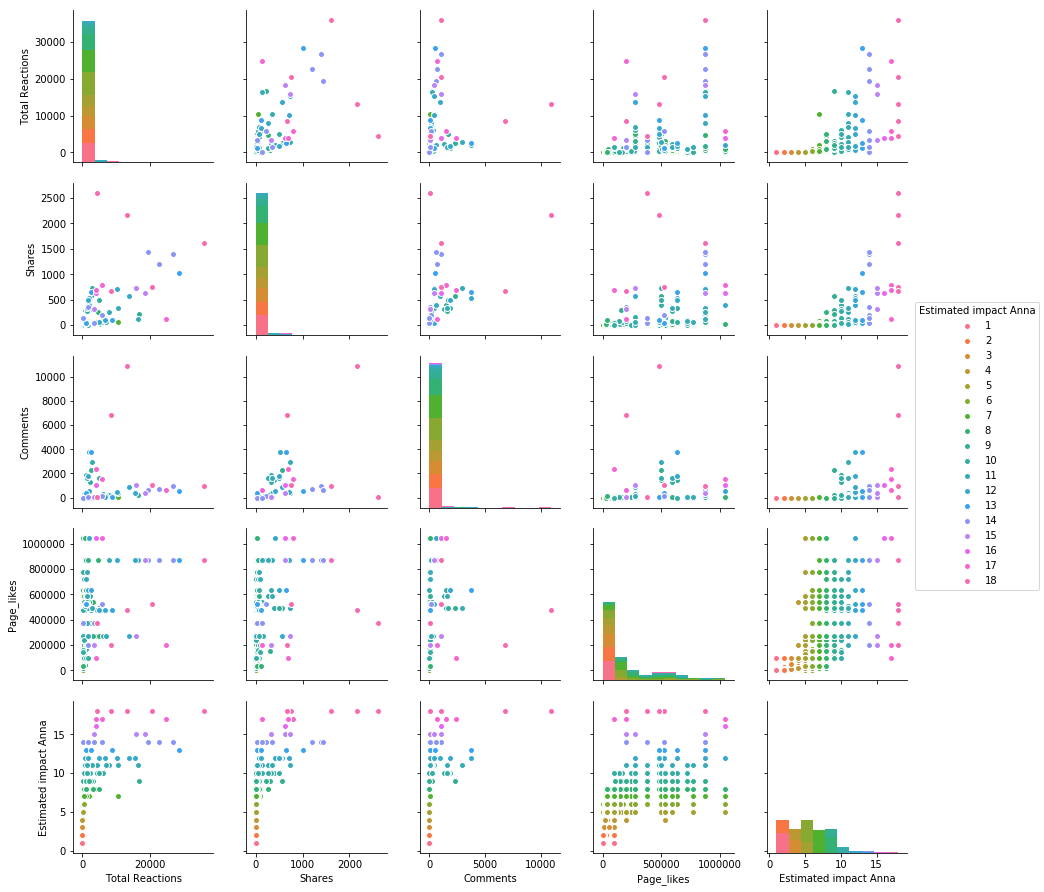

In [35]:
#create pairplot of the feature variables
sns.pairplot(facebook, hue='Estimated impact Anna')


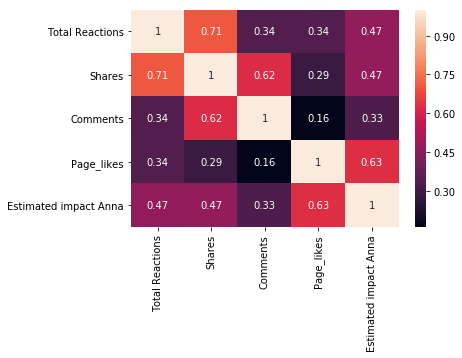

In [36]:
#create correlation plot
sns.heatmap(facebook.corr(), annot = True)

In [37]:
#feature engineering
X = facebook.drop('Estimated impact Anna', axis=1)
X = X.apply(preprocessing.scale, axis=0)
y = facebook['Estimated impact Anna'].values
y_cat = to_categorical(y)
y_cat = y_cat[:,1:]


C:\Users\ntarz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ntarz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ntarz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ntarz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ntarz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int

In [38]:
#NN Model
X_train, X_test, y_train, y_test = train_test_split(X.values, y_cat, test_size=0.2, random_state= 123)

In [ ]:
#--------------------------------------------Grid Search Hyperparameters Tuning --------------------------------------------------#

#Epoch tuning
def create_model():
    model  = Sequential ()
    model.add(Dense(200, input_shape=(4,), activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(18, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=0.009), metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn = create_model)

epochs = [500, 1000, 1500, 3000]
param_grid = dict(epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, verbose=10)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) #3000

#Optimizer tuning
def create_model(optimizer='adam'):
    model  = Sequential ()
    model.add(Dense(200, input_shape=(4,), activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(18, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn = create_model, epochs = 1000)

optimizer = ['SGD', 'RMSprop','Adam']
param_grid = dict(optimizer = optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, verbose=10)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) #Adam

#Learning Rate, Momentum tuning
def create_model(learn_rate=0.009):
    model  = Sequential ()
    model.add(Dense(200, input_shape=(4,), activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(18, activation='softmax'))
    optimizer = Adam(lr=learn_rate)
    model.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, epochs=1000)
learn_rate = [0.001, 0.009, 0.01, 0.1]
param_grid = dict(learn_rate=learn_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, verbose=10)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) #0.001

#Weight Initialization tuning
def create_model(init_mode='uniform'):
    model  = Sequential ()
    model.add(Dense(200, input_shape=(4,), kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(200, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(200, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(100, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(18, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=0.001), metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, epochs=1000)
# define the grid search parameters
init_mode = ['uniform', 'glorot_normal', 'normal', 'zero']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, verbose=10)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) #glorot_normal
    
    
#Activation Function Tuning
def create_model(activation='relu'):
    model  = Sequential ()
    model.add(Dense(200, input_shape=(4,), kernel_initializer='glorot_normal', activation=activation))
    model.add(Dense(200, kernel_initializer='glorot_normal', activation=activation))
    model.add(Dense(200, kernel_initializer='glorot_normal', activation=activation))
    model.add(Dense(100, kernel_initializer='glorot_normal', activation=activation))
    model.add(Dense(18, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=0.001), metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, epochs=1000)
# define the grid search parameters
activation = ['softplus', 'relu', 'tanh', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, verbose=10)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) #relu
    
 
#Regularization penalty Tuning
from keras import regularizers
def create_model(beta=0.0001):
    model  = Sequential ()
    model.add(Dense(200, input_shape=(4,), kernel_initializer='glorot_normal', activation='relu', kernel_regularizer=regularizers.l2(beta)))
    model.add(Dense(200, kernel_initializer='glorot_normal', activation='relu', kernel_regularizer=regularizers.l2(beta)))
    model.add(Dense(200, kernel_initializer='glorot_normal', activation='relu', kernel_regularizer=regularizers.l2(beta)))
    model.add(Dense(100, kernel_initializer='glorot_normal', activation='relu', kernel_regularizer=regularizers.l2(beta)))
    model.add(Dense(18, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=0.001), metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, epochs=1000)

beta = [0.0001, 0.001, 0.01]
param_grid = dict(beta=beta)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, verbose=10)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) #0.0001

#Number of hidden Units tuning
from keras import regularizers
def create_model(neurons=101):
    model  = Sequential ()
    model.add(Dense(neurons, input_shape=(4,), kernel_initializer='glorot_normal', activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
    model.add(Dense(neurons, kernel_initializer='glorot_normal', activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
    model.add(Dense(neurons, kernel_initializer='glorot_normal', activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
    model.add(Dense(neurons-100, kernel_initializer='glorot_normal', activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
    model.add(Dense(18, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=0.001), metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, epochs=15000)
# define the grid search parameters
neurons = [200, 300, 400, 500]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, verbose=10)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) #200

In [ ]:
#--------------------------------------------Final Modeling (Tuned Model)--------------------------------------------------#

model  = Sequential ()
model.add(Dense(200, input_shape=(4,), kernel_initializer='glorot_normal', activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(200, kernel_initializer='glorot_normal', activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(200, kernel_initializer='glorot_normal', activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(100, kernel_initializer='glorot_normal', activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(18, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=0.001), metrics=['accuracy'])
#Fit
history=model.fit(X_train, y_train, epochs=15000, verbose=2)
result=model.evaluate(X_test,y_test)    

Epoch 1/15000
 - 1s - loss: 2.6896 - acc: 0.1786
Epoch 2/15000
 - 0s - loss: 2.0322 - acc: 0.2511
Epoch 3/15000
 - 0s - loss: 1.8930 - acc: 0.2779
Epoch 4/15000
 - 0s - loss: 1.8580 - acc: 0.2690
Epoch 5/15000
 - 0s - loss: 1.8098 - acc: 0.3047
Epoch 6/15000
 - 0s - loss: 1.7587 - acc: 0.2946
Epoch 7/15000
 - 0s - loss: 1.7170 - acc: 0.3270
Epoch 8/15000
 - 0s - loss: 1.7103 - acc: 0.3225
Epoch 9/15000
 - 0s - loss: 1.6908 - acc: 0.3181
Epoch 10/15000
 - 0s - loss: 1.6883 - acc: 0.3382
Epoch 11/15000
 - 0s - loss: 1.6293 - acc: 0.3393
Epoch 12/15000
 - 0s - loss: 1.6190 - acc: 0.3594
Epoch 13/15000
 - 0s - loss: 1.6289 - acc: 0.3393
Epoch 14/15000
 - 0s - loss: 1.5981 - acc: 0.3504
Epoch 15/15000
 - 0s - loss: 1.5809 - acc: 0.3482
Epoch 16/15000
 - 0s - loss: 1.5677 - acc: 0.3683
Epoch 17/15000
 - 0s - loss: 1.5877 - acc: 0.3583
Epoch 18/15000
 - 0s - loss: 1.5597 - acc: 0.4062
Epoch 19/15000
 - 0s - loss: 1.5374 - acc: 0.3962
Epoch 20/15000
 - 0s - loss: 1.6308 - acc: 0.3571
Epoch 21/

Epoch 164/15000
 - 0s - loss: 1.1773 - acc: 0.5558
Epoch 165/15000
 - 0s - loss: 1.1444 - acc: 0.5580
Epoch 166/15000
 - 0s - loss: 1.1584 - acc: 0.5670
Epoch 167/15000
 - 0s - loss: 1.1392 - acc: 0.5658
Epoch 168/15000
 - 0s - loss: 1.1429 - acc: 0.5547
Epoch 169/15000
 - 0s - loss: 1.1303 - acc: 0.5670
Epoch 170/15000
 - 0s - loss: 1.1150 - acc: 0.5826
Epoch 171/15000
 - 0s - loss: 1.1016 - acc: 0.5904
Epoch 172/15000
 - 0s - loss: 1.1170 - acc: 0.5737
Epoch 173/15000
 - 0s - loss: 1.1108 - acc: 0.5792
Epoch 174/15000
 - 0s - loss: 1.1015 - acc: 0.6016
Epoch 175/15000
 - 0s - loss: 1.0909 - acc: 0.5960
Epoch 176/15000
 - 0s - loss: 1.1239 - acc: 0.5770
Epoch 177/15000
 - 0s - loss: 1.1025 - acc: 0.5871
Epoch 178/15000
 - 0s - loss: 1.1130 - acc: 0.5815
Epoch 179/15000
 - 0s - loss: 1.1040 - acc: 0.5871
Epoch 180/15000
 - 0s - loss: 1.0798 - acc: 0.6027
Epoch 181/15000
 - 0s - loss: 1.1324 - acc: 0.5949
Epoch 182/15000
 - 0s - loss: 1.1051 - acc: 0.5904
Epoch 183/15000
 - 0s - loss: 1

Epoch 325/15000
 - 0s - loss: 0.9533 - acc: 0.6507
Epoch 326/15000
 - 0s - loss: 0.9109 - acc: 0.6708
Epoch 327/15000
 - 0s - loss: 0.8908 - acc: 0.6964
Epoch 328/15000
 - 0s - loss: 0.8940 - acc: 0.6741
Epoch 329/15000
 - 0s - loss: 0.9314 - acc: 0.6674
Epoch 330/15000
 - 0s - loss: 0.9245 - acc: 0.6518
Epoch 331/15000
 - 0s - loss: 0.9229 - acc: 0.6763
Epoch 332/15000
 - 0s - loss: 1.0163 - acc: 0.6306
Epoch 333/15000
 - 0s - loss: 0.9421 - acc: 0.6708
Epoch 334/15000
 - 0s - loss: 0.9376 - acc: 0.6596
Epoch 335/15000
 - 0s - loss: 0.9198 - acc: 0.6719
Epoch 336/15000
 - 0s - loss: 0.8980 - acc: 0.6987
Epoch 337/15000
 - 0s - loss: 0.9294 - acc: 0.6797
Epoch 338/15000
 - 0s - loss: 0.9747 - acc: 0.6741
Epoch 339/15000
 - 0s - loss: 0.9932 - acc: 0.6696
Epoch 340/15000
 - 0s - loss: 0.9705 - acc: 0.6652
Epoch 341/15000
 - 0s - loss: 0.9122 - acc: 0.6708
Epoch 342/15000
 - 0s - loss: 0.9094 - acc: 0.6908
Epoch 343/15000
 - 0s - loss: 0.9611 - acc: 0.6652
Epoch 344/15000
 - 0s - loss: 0

Epoch 486/15000
 - 0s - loss: 0.7923 - acc: 0.7344
Epoch 487/15000
 - 0s - loss: 0.7801 - acc: 0.7411
Epoch 488/15000
 - 0s - loss: 0.7546 - acc: 0.7522
Epoch 489/15000
 - 0s - loss: 0.8227 - acc: 0.7243
Epoch 490/15000
 - 0s - loss: 0.8466 - acc: 0.6998
Epoch 491/15000
 - 0s - loss: 0.7932 - acc: 0.7232
Epoch 492/15000
 - 0s - loss: 0.7518 - acc: 0.7623
Epoch 493/15000
 - 0s - loss: 0.7579 - acc: 0.7478
Epoch 494/15000
 - 0s - loss: 0.7606 - acc: 0.7478
Epoch 495/15000
 - 0s - loss: 0.7591 - acc: 0.7455
Epoch 496/15000
 - 0s - loss: 0.7906 - acc: 0.7288
Epoch 497/15000
 - 0s - loss: 0.7407 - acc: 0.7645
Epoch 498/15000
 - 0s - loss: 0.8027 - acc: 0.7321
Epoch 499/15000
 - 0s - loss: 0.7623 - acc: 0.7433
Epoch 500/15000
 - 0s - loss: 0.7754 - acc: 0.7500
Epoch 501/15000
 - 0s - loss: 0.7796 - acc: 0.7310
Epoch 502/15000
 - 0s - loss: 0.7774 - acc: 0.7511
Epoch 503/15000
 - 0s - loss: 0.8120 - acc: 0.7455
Epoch 504/15000
 - 0s - loss: 0.7561 - acc: 0.7511
Epoch 505/15000
 - 0s - loss: 0

Epoch 647/15000
 - 0s - loss: 0.7051 - acc: 0.7634
Epoch 648/15000
 - 0s - loss: 0.6998 - acc: 0.7812
Epoch 649/15000
 - 0s - loss: 0.6841 - acc: 0.7824
Epoch 650/15000
 - 0s - loss: 0.6798 - acc: 0.7779
Epoch 651/15000
 - 0s - loss: 0.6582 - acc: 0.8036
Epoch 652/15000
 - 0s - loss: 0.6732 - acc: 0.7991
Epoch 653/15000
 - 0s - loss: 0.6642 - acc: 0.8013
Epoch 654/15000
 - 0s - loss: 0.6919 - acc: 0.7801
Epoch 655/15000
 - 0s - loss: 0.7148 - acc: 0.7667
Epoch 656/15000
 - 0s - loss: 0.7480 - acc: 0.7400
Epoch 657/15000
 - 0s - loss: 0.7625 - acc: 0.7377
Epoch 658/15000
 - 0s - loss: 0.7504 - acc: 0.7455
Epoch 659/15000
 - 0s - loss: 0.7520 - acc: 0.7612
Epoch 660/15000
 - 0s - loss: 0.7401 - acc: 0.7567
Epoch 661/15000
 - 0s - loss: 0.6983 - acc: 0.7734
Epoch 662/15000
 - 0s - loss: 0.6936 - acc: 0.7812
Epoch 663/15000
 - 0s - loss: 0.6870 - acc: 0.7835
Epoch 664/15000
 - 0s - loss: 0.6960 - acc: 0.7701
Epoch 665/15000
 - 0s - loss: 0.6663 - acc: 0.7991
Epoch 666/15000
 - 0s - loss: 0

Epoch 808/15000
 - 0s - loss: 0.6456 - acc: 0.7857
Epoch 809/15000
 - 0s - loss: 0.6596 - acc: 0.7857
Epoch 810/15000
 - 0s - loss: 0.7686 - acc: 0.7422
Epoch 811/15000
 - 0s - loss: 0.6494 - acc: 0.8013
Epoch 812/15000
 - 0s - loss: 0.6255 - acc: 0.8136
Epoch 813/15000
 - 0s - loss: 0.6451 - acc: 0.7946
Epoch 814/15000
 - 0s - loss: 0.6518 - acc: 0.8047
Epoch 815/15000
 - 0s - loss: 0.6253 - acc: 0.8036
Epoch 816/15000
 - 0s - loss: 0.6381 - acc: 0.7969
Epoch 817/15000
 - 0s - loss: 0.6456 - acc: 0.8058
Epoch 818/15000
 - 0s - loss: 0.6292 - acc: 0.7958
Epoch 819/15000
 - 0s - loss: 0.6443 - acc: 0.7946
Epoch 820/15000
 - 0s - loss: 0.7198 - acc: 0.7634
Epoch 821/15000
 - 0s - loss: 0.7147 - acc: 0.7556
Epoch 822/15000
 - 0s - loss: 0.6343 - acc: 0.8036
Epoch 823/15000
 - 0s - loss: 0.6119 - acc: 0.8203
Epoch 824/15000
 - 0s - loss: 0.6400 - acc: 0.8036
Epoch 825/15000
 - 0s - loss: 0.6463 - acc: 0.8147
Epoch 826/15000
 - 0s - loss: 0.6352 - acc: 0.7946
Epoch 827/15000
 - 0s - loss: 0

Epoch 969/15000
 - 0s - loss: 0.6246 - acc: 0.8147
Epoch 970/15000
 - 0s - loss: 0.6172 - acc: 0.8114
Epoch 971/15000
 - 0s - loss: 0.6198 - acc: 0.7969
Epoch 972/15000
 - 0s - loss: 0.6008 - acc: 0.8259
Epoch 973/15000
 - 0s - loss: 0.6891 - acc: 0.7701
Epoch 974/15000
 - 0s - loss: 0.7390 - acc: 0.7612
Epoch 975/15000
 - 0s - loss: 0.6868 - acc: 0.7801
Epoch 976/15000
 - 0s - loss: 0.6852 - acc: 0.7656
Epoch 977/15000
 - 0s - loss: 0.6899 - acc: 0.7779
Epoch 978/15000
 - 0s - loss: 0.7609 - acc: 0.7801
Epoch 979/15000
 - 0s - loss: 0.6864 - acc: 0.7913
Epoch 980/15000
 - 0s - loss: 0.6798 - acc: 0.8036
Epoch 981/15000
 - 0s - loss: 0.6733 - acc: 0.8147
Epoch 982/15000
 - 0s - loss: 0.6355 - acc: 0.8281
Epoch 983/15000
 - 0s - loss: 0.6108 - acc: 0.8259
Epoch 984/15000
 - 0s - loss: 0.5846 - acc: 0.8304
Epoch 985/15000
 - 0s - loss: 0.6336 - acc: 0.8013
Epoch 986/15000
 - 0s - loss: 0.6804 - acc: 0.7734
Epoch 987/15000
 - 0s - loss: 0.7002 - acc: 0.7701
Epoch 988/15000
 - 0s - loss: 0

 - 0s - loss: 0.6170 - acc: 0.8092
Epoch 1128/15000
 - 0s - loss: 0.6115 - acc: 0.8114
Epoch 1129/15000
 - 0s - loss: 0.5830 - acc: 0.8359
Epoch 1130/15000
 - 0s - loss: 0.5770 - acc: 0.8281
Epoch 1131/15000
 - 0s - loss: 0.5959 - acc: 0.8225
Epoch 1132/15000
 - 0s - loss: 0.5980 - acc: 0.8214
Epoch 1133/15000
 - 0s - loss: 0.5745 - acc: 0.8181
Epoch 1134/15000
 - 0s - loss: 0.5678 - acc: 0.8371
Epoch 1135/15000
 - 0s - loss: 0.5900 - acc: 0.8237
Epoch 1136/15000
 - 0s - loss: 0.5825 - acc: 0.8304
Epoch 1137/15000
 - 0s - loss: 0.6010 - acc: 0.8203
Epoch 1138/15000
 - 0s - loss: 0.5695 - acc: 0.8348
Epoch 1139/15000
 - 0s - loss: 0.5594 - acc: 0.8393
Epoch 1140/15000
 - 0s - loss: 0.5361 - acc: 0.8460
Epoch 1141/15000
 - 0s - loss: 0.5764 - acc: 0.8237
Epoch 1142/15000
 - 0s - loss: 0.5914 - acc: 0.8192
Epoch 1143/15000
 - 0s - loss: 0.5732 - acc: 0.8270
Epoch 1144/15000
 - 0s - loss: 0.6430 - acc: 0.7958
Epoch 1145/15000
 - 0s - loss: 0.5903 - acc: 0.8359
Epoch 1146/15000
 - 0s - loss

Epoch 1285/15000
 - 0s - loss: 0.5775 - acc: 0.8225
Epoch 1286/15000
 - 0s - loss: 0.5653 - acc: 0.8359
Epoch 1287/15000
 - 0s - loss: 0.5170 - acc: 0.8638
Epoch 1288/15000
 - 0s - loss: 0.5130 - acc: 0.8672
Epoch 1289/15000
 - 0s - loss: 0.5292 - acc: 0.8516
Epoch 1290/15000
 - 0s - loss: 0.5558 - acc: 0.8315
Epoch 1291/15000
 - 0s - loss: 0.5674 - acc: 0.8382
Epoch 1292/15000
 - 0s - loss: 0.5760 - acc: 0.8147
Epoch 1293/15000
 - 0s - loss: 0.6020 - acc: 0.8114
Epoch 1294/15000
 - 0s - loss: 0.5393 - acc: 0.8471
Epoch 1295/15000
 - 0s - loss: 0.5555 - acc: 0.8393
Epoch 1296/15000
 - 0s - loss: 0.5913 - acc: 0.8292
Epoch 1297/15000
 - 0s - loss: 0.5919 - acc: 0.8259
Epoch 1298/15000
 - 0s - loss: 0.5529 - acc: 0.8337
Epoch 1299/15000
 - 0s - loss: 0.5448 - acc: 0.8471
Epoch 1300/15000
 - 0s - loss: 0.5542 - acc: 0.8460
Epoch 1301/15000
 - 0s - loss: 0.6325 - acc: 0.7980
Epoch 1302/15000
 - 0s - loss: 0.6146 - acc: 0.8047
Epoch 1303/15000
 - 0s - loss: 0.5866 - acc: 0.8326
Epoch 1304/1

Epoch 1443/15000
 - 0s - loss: 0.5059 - acc: 0.8527
Epoch 1444/15000
 - 0s - loss: 0.5422 - acc: 0.8426
Epoch 1445/15000
 - 0s - loss: 0.5787 - acc: 0.8348
Epoch 1446/15000
 - 0s - loss: 0.5245 - acc: 0.8527
Epoch 1447/15000
 - 0s - loss: 0.4890 - acc: 0.8594
Epoch 1448/15000
 - 0s - loss: 0.5098 - acc: 0.8672
Epoch 1449/15000
 - 0s - loss: 0.5376 - acc: 0.8493
Epoch 1450/15000
 - 0s - loss: 0.5231 - acc: 0.8549
Epoch 1451/15000
 - 0s - loss: 0.4931 - acc: 0.8705
Epoch 1452/15000
 - 0s - loss: 0.5399 - acc: 0.8449
Epoch 1453/15000
 - 0s - loss: 0.5855 - acc: 0.8404
Epoch 1454/15000
 - 0s - loss: 0.5744 - acc: 0.8237
Epoch 1455/15000
 - 0s - loss: 0.5259 - acc: 0.8471
Epoch 1456/15000
 - 0s - loss: 0.4850 - acc: 0.8627
Epoch 1457/15000
 - 0s - loss: 0.4817 - acc: 0.8761
Epoch 1458/15000
 - 0s - loss: 0.4782 - acc: 0.8650
Epoch 1459/15000
 - 0s - loss: 0.4653 - acc: 0.8783
Epoch 1460/15000
 - 0s - loss: 0.4949 - acc: 0.8616
Epoch 1461/15000
 - 0s - loss: 0.4905 - acc: 0.8694
Epoch 1462/1

Epoch 1601/15000
 - 0s - loss: 0.5243 - acc: 0.8516
Epoch 1602/15000
 - 0s - loss: 0.4672 - acc: 0.8705
Epoch 1603/15000
 - 0s - loss: 0.4919 - acc: 0.8728
Epoch 1604/15000
 - 0s - loss: 0.5005 - acc: 0.8516
Epoch 1605/15000
 - 0s - loss: 0.4868 - acc: 0.8683
Epoch 1606/15000
 - 0s - loss: 0.4829 - acc: 0.8672
Epoch 1607/15000
 - 0s - loss: 0.6401 - acc: 0.8125
Epoch 1608/15000
 - 0s - loss: 0.6668 - acc: 0.8158
Epoch 1609/15000
 - 0s - loss: 0.5601 - acc: 0.8359
Epoch 1610/15000
 - 0s - loss: 0.4938 - acc: 0.8571
Epoch 1611/15000
 - 0s - loss: 0.4752 - acc: 0.8672
Epoch 1612/15000
 - 0s - loss: 0.4763 - acc: 0.8783
Epoch 1613/15000
 - 0s - loss: 0.5009 - acc: 0.8694
Epoch 1614/15000
 - 0s - loss: 0.4968 - acc: 0.8549
Epoch 1615/15000
 - 0s - loss: 0.4512 - acc: 0.8940
Epoch 1616/15000
 - 0s - loss: 0.4802 - acc: 0.8672
Epoch 1617/15000
 - 0s - loss: 0.4609 - acc: 0.8817
Epoch 1618/15000
 - 0s - loss: 0.4474 - acc: 0.8772
Epoch 1619/15000
 - 0s - loss: 0.4780 - acc: 0.8717
Epoch 1620/1

Epoch 1759/15000
 - 0s - loss: 0.4493 - acc: 0.8817
Epoch 1760/15000
 - 0s - loss: 0.4882 - acc: 0.8739
Epoch 1761/15000
 - 0s - loss: 0.5430 - acc: 0.8549
Epoch 1762/15000
 - 0s - loss: 0.4561 - acc: 0.8783
Epoch 1763/15000
 - 0s - loss: 0.4649 - acc: 0.8839
Epoch 1764/15000
 - 0s - loss: 0.5488 - acc: 0.8426
Epoch 1765/15000
 - 0s - loss: 0.5201 - acc: 0.8382
Epoch 1766/15000
 - 0s - loss: 0.4470 - acc: 0.8996
Epoch 1767/15000
 - 0s - loss: 0.4674 - acc: 0.8661
Epoch 1768/15000
 - 0s - loss: 0.4555 - acc: 0.8850
Epoch 1769/15000
 - 0s - loss: 0.4548 - acc: 0.8806
Epoch 1770/15000
 - 0s - loss: 0.4241 - acc: 0.8951
Epoch 1771/15000
 - 0s - loss: 0.4267 - acc: 0.9029
Epoch 1772/15000
 - 0s - loss: 0.4285 - acc: 0.8996
Epoch 1773/15000
 - 0s - loss: 0.4472 - acc: 0.8873
Epoch 1774/15000
 - 0s - loss: 0.4725 - acc: 0.8728
Epoch 1775/15000
 - 0s - loss: 0.4719 - acc: 0.8862
Epoch 1776/15000
 - 0s - loss: 0.4500 - acc: 0.8850
Epoch 1777/15000
 - 0s - loss: 0.4326 - acc: 0.9007
Epoch 1778/1

Epoch 1917/15000
 - 0s - loss: 0.5202 - acc: 0.8739
Epoch 1918/15000
 - 0s - loss: 0.4893 - acc: 0.8616
Epoch 1919/15000
 - 0s - loss: 0.4210 - acc: 0.9018
Epoch 1920/15000
 - 0s - loss: 0.4113 - acc: 0.9029
Epoch 1921/15000
 - 0s - loss: 0.4403 - acc: 0.8895
Epoch 1922/15000
 - 0s - loss: 0.4297 - acc: 0.8940
Epoch 1923/15000
 - 0s - loss: 0.4642 - acc: 0.8873
Epoch 1924/15000
 - 0s - loss: 0.4525 - acc: 0.8795
Epoch 1925/15000
 - 0s - loss: 0.5047 - acc: 0.8583
Epoch 1926/15000
 - 0s - loss: 0.5441 - acc: 0.8594
Epoch 1927/15000
 - 0s - loss: 0.5369 - acc: 0.8538
Epoch 1928/15000
 - 0s - loss: 0.6444 - acc: 0.8304
Epoch 1929/15000
 - 0s - loss: 0.6650 - acc: 0.8281
Epoch 1930/15000
 - 0s - loss: 0.5657 - acc: 0.8638
Epoch 1931/15000
 - 0s - loss: 0.4869 - acc: 0.8783
Epoch 1932/15000
 - 0s - loss: 0.4620 - acc: 0.8839
Epoch 1933/15000
 - 0s - loss: 0.4313 - acc: 0.8940
Epoch 1934/15000
 - 0s - loss: 0.5340 - acc: 0.8382
Epoch 1935/15000
 - 0s - loss: 0.5068 - acc: 0.8527
Epoch 1936/1

Epoch 2075/15000
 - 0s - loss: 0.5016 - acc: 0.8516
Epoch 2076/15000
 - 0s - loss: 0.4363 - acc: 0.9040
Epoch 2077/15000
 - 0s - loss: 0.4066 - acc: 0.8962
Epoch 2078/15000
 - 0s - loss: 0.4509 - acc: 0.8795
Epoch 2079/15000
 - 0s - loss: 0.4964 - acc: 0.8717
Epoch 2080/15000
 - 0s - loss: 0.4797 - acc: 0.8627
Epoch 2081/15000
 - 0s - loss: 0.4255 - acc: 0.8929
Epoch 2082/15000
 - 0s - loss: 0.3983 - acc: 0.9107
Epoch 2083/15000
 - 0s - loss: 0.4128 - acc: 0.9018
Epoch 2084/15000
 - 0s - loss: 0.4456 - acc: 0.8817
Epoch 2085/15000
 - 0s - loss: 0.4947 - acc: 0.8672
Epoch 2086/15000
 - 0s - loss: 0.4780 - acc: 0.8739
Epoch 2087/15000
 - 0s - loss: 0.5257 - acc: 0.8783
Epoch 2088/15000
 - 0s - loss: 0.5276 - acc: 0.8739
Epoch 2089/15000
 - 0s - loss: 0.4870 - acc: 0.8717
Epoch 2090/15000
 - 0s - loss: 0.4463 - acc: 0.8906
Epoch 2091/15000
 - 0s - loss: 0.4117 - acc: 0.9051
Epoch 2092/15000
 - 0s - loss: 0.4475 - acc: 0.8839
Epoch 2093/15000
 - 0s - loss: 0.4284 - acc: 0.8951
Epoch 2094/1

Epoch 2233/15000
 - 0s - loss: 0.4002 - acc: 0.9051
Epoch 2234/15000
 - 0s - loss: 0.3976 - acc: 0.9040
Epoch 2235/15000
 - 0s - loss: 0.4129 - acc: 0.8895
Epoch 2236/15000
 - 0s - loss: 0.3990 - acc: 0.9074
Epoch 2237/15000
 - 0s - loss: 0.4147 - acc: 0.9018
Epoch 2238/15000
 - 0s - loss: 0.3986 - acc: 0.9074
Epoch 2239/15000
 - 0s - loss: 0.4455 - acc: 0.8817
Epoch 2240/15000
 - 0s - loss: 0.4119 - acc: 0.8984
Epoch 2241/15000
 - 0s - loss: 0.3864 - acc: 0.9062
Epoch 2242/15000
 - 0s - loss: 0.4184 - acc: 0.9029
Epoch 2243/15000
 - 0s - loss: 0.3964 - acc: 0.9085
Epoch 2244/15000
 - 0s - loss: 0.3903 - acc: 0.9129
Epoch 2245/15000
 - 0s - loss: 0.4229 - acc: 0.8929
Epoch 2246/15000
 - 0s - loss: 0.4383 - acc: 0.8817
Epoch 2247/15000
 - 0s - loss: 0.4464 - acc: 0.8817
Epoch 2248/15000
 - 0s - loss: 0.4239 - acc: 0.8917
Epoch 2249/15000
 - 0s - loss: 0.4186 - acc: 0.8940
Epoch 2250/15000
 - 0s - loss: 0.4248 - acc: 0.8906
Epoch 2251/15000
 - 0s - loss: 0.4336 - acc: 0.8962
Epoch 2252/1

Epoch 2391/15000
 - 0s - loss: 0.4116 - acc: 0.8917
Epoch 2392/15000
 - 0s - loss: 0.4019 - acc: 0.9096
Epoch 2393/15000
 - 0s - loss: 0.3831 - acc: 0.9118
Epoch 2394/15000
 - 0s - loss: 0.4017 - acc: 0.9018
Epoch 2395/15000
 - 0s - loss: 0.4404 - acc: 0.8783
Epoch 2396/15000
 - 0s - loss: 0.4707 - acc: 0.8683
Epoch 2397/15000
 - 0s - loss: 0.4553 - acc: 0.8817
Epoch 2398/15000
 - 0s - loss: 0.4364 - acc: 0.8806
Epoch 2399/15000
 - 0s - loss: 0.3881 - acc: 0.9152
Epoch 2400/15000
 - 0s - loss: 0.3961 - acc: 0.9074
Epoch 2401/15000
 - 0s - loss: 0.3619 - acc: 0.9297
Epoch 2402/15000
 - 0s - loss: 0.3657 - acc: 0.9163
Epoch 2403/15000
 - 0s - loss: 0.4024 - acc: 0.9118
Epoch 2404/15000
 - 0s - loss: 0.3692 - acc: 0.9196
Epoch 2405/15000
 - 0s - loss: 0.3837 - acc: 0.9196
Epoch 2406/15000
 - 0s - loss: 0.4192 - acc: 0.8929
Epoch 2407/15000
 - 0s - loss: 0.4956 - acc: 0.8549
Epoch 2408/15000
 - 0s - loss: 0.4247 - acc: 0.9074
Epoch 2409/15000
 - 0s - loss: 0.4112 - acc: 0.9029
Epoch 2410/1

Epoch 2549/15000
 - 0s - loss: 0.4467 - acc: 0.8862
Epoch 2550/15000
 - 0s - loss: 0.3737 - acc: 0.9141
Epoch 2551/15000
 - 0s - loss: 0.3834 - acc: 0.9074
Epoch 2552/15000
 - 0s - loss: 0.3762 - acc: 0.9129
Epoch 2553/15000
 - 0s - loss: 0.3706 - acc: 0.9219
Epoch 2554/15000
 - 0s - loss: 0.3832 - acc: 0.9029
Epoch 2555/15000
 - 0s - loss: 0.4001 - acc: 0.8940
Epoch 2556/15000
 - 0s - loss: 0.3674 - acc: 0.9174
Epoch 2557/15000
 - 0s - loss: 0.3797 - acc: 0.9118
Epoch 2558/15000
 - 0s - loss: 0.3600 - acc: 0.9208
Epoch 2559/15000
 - 0s - loss: 0.3671 - acc: 0.9129
Epoch 2560/15000
 - 0s - loss: 0.3613 - acc: 0.9152
Epoch 2561/15000
 - 0s - loss: 0.3584 - acc: 0.9230
Epoch 2562/15000
 - 0s - loss: 0.3600 - acc: 0.9241
Epoch 2563/15000
 - 0s - loss: 0.3663 - acc: 0.9185
Epoch 2564/15000
 - 0s - loss: 0.3929 - acc: 0.9040
Epoch 2565/15000
 - 0s - loss: 0.4074 - acc: 0.8996
Epoch 2566/15000
 - 0s - loss: 0.4846 - acc: 0.8783
Epoch 2567/15000
 - 0s - loss: 0.4794 - acc: 0.8672
Epoch 2568/1

Epoch 2707/15000
 - 0s - loss: 0.3632 - acc: 0.9275
Epoch 2708/15000
 - 0s - loss: 0.3454 - acc: 0.9342
Epoch 2709/15000
 - 0s - loss: 0.3826 - acc: 0.9107
Epoch 2710/15000
 - 0s - loss: 0.3713 - acc: 0.9129
Epoch 2711/15000
 - 0s - loss: 0.3825 - acc: 0.9141
Epoch 2712/15000
 - 0s - loss: 0.3892 - acc: 0.9051
Epoch 2713/15000
 - 0s - loss: 0.4187 - acc: 0.9007
Epoch 2714/15000
 - 0s - loss: 0.4053 - acc: 0.9040
Epoch 2715/15000
 - 0s - loss: 0.3991 - acc: 0.8873
Epoch 2716/15000
 - 0s - loss: 0.3689 - acc: 0.9129
Epoch 2717/15000
 - 0s - loss: 0.3823 - acc: 0.9062
Epoch 2718/15000
 - 0s - loss: 0.3968 - acc: 0.9062
Epoch 2719/15000
 - 0s - loss: 0.3928 - acc: 0.9062
Epoch 2720/15000
 - 0s - loss: 0.3912 - acc: 0.9051
Epoch 2721/15000
 - 0s - loss: 0.4249 - acc: 0.8895
Epoch 2722/15000
 - 0s - loss: 0.4001 - acc: 0.9007
Epoch 2723/15000
 - 0s - loss: 0.4240 - acc: 0.8940
Epoch 2724/15000
 - 0s - loss: 0.3797 - acc: 0.9096
Epoch 2725/15000
 - 0s - loss: 0.3731 - acc: 0.9096
Epoch 2726/1

Epoch 2865/15000
 - 0s - loss: 0.3479 - acc: 0.9275
Epoch 2866/15000
 - 0s - loss: 0.3900 - acc: 0.9118
Epoch 2867/15000
 - 0s - loss: 0.3788 - acc: 0.9051
Epoch 2868/15000
 - 0s - loss: 0.4018 - acc: 0.8917
Epoch 2869/15000
 - 0s - loss: 0.3971 - acc: 0.9085
Epoch 2870/15000
 - 0s - loss: 0.4727 - acc: 0.8761
Epoch 2871/15000
 - 0s - loss: 0.4380 - acc: 0.8940
Epoch 2872/15000
 - 0s - loss: 0.4277 - acc: 0.8828
Epoch 2873/15000
 - 0s - loss: 0.5361 - acc: 0.8694
Epoch 2874/15000
 - 0s - loss: 0.4375 - acc: 0.8884
Epoch 2875/15000
 - 0s - loss: 0.4229 - acc: 0.8962
Epoch 2876/15000
 - 0s - loss: 0.4010 - acc: 0.9051
Epoch 2877/15000
 - 0s - loss: 0.4096 - acc: 0.9074
Epoch 2878/15000
 - 0s - loss: 0.4551 - acc: 0.8806
Epoch 2879/15000
 - 0s - loss: 0.5001 - acc: 0.8828
Epoch 2880/15000
 - 0s - loss: 0.4931 - acc: 0.8605
Epoch 2881/15000
 - 0s - loss: 0.4284 - acc: 0.8828
Epoch 2882/15000
 - 0s - loss: 0.3539 - acc: 0.9118
Epoch 2883/15000
 - 0s - loss: 0.3866 - acc: 0.8996
Epoch 2884/1

Epoch 3023/15000
 - 0s - loss: 0.4298 - acc: 0.8984
Epoch 3024/15000
 - 0s - loss: 0.3947 - acc: 0.9051
Epoch 3025/15000
 - 0s - loss: 0.3810 - acc: 0.9074
Epoch 3026/15000
 - 0s - loss: 0.3620 - acc: 0.9107
Epoch 3027/15000
 - 0s - loss: 0.4081 - acc: 0.8951
Epoch 3028/15000
 - 0s - loss: 0.3797 - acc: 0.9107
Epoch 3029/15000
 - 0s - loss: 0.4055 - acc: 0.8839
Epoch 3030/15000
 - 0s - loss: 0.3917 - acc: 0.8984
Epoch 3031/15000
 - 0s - loss: 0.3599 - acc: 0.9185
Epoch 3032/15000
 - 0s - loss: 0.3479 - acc: 0.9241
Epoch 3033/15000
 - 0s - loss: 0.3878 - acc: 0.9107
Epoch 3034/15000
 - 0s - loss: 0.4228 - acc: 0.8962
Epoch 3035/15000
 - 0s - loss: 0.3612 - acc: 0.9141
Epoch 3036/15000
 - 0s - loss: 0.3387 - acc: 0.9252
Epoch 3037/15000
 - 0s - loss: 0.3295 - acc: 0.9286
Epoch 3038/15000
 - 0s - loss: 0.3432 - acc: 0.9263
Epoch 3039/15000
 - 0s - loss: 0.3460 - acc: 0.9230
Epoch 3040/15000
 - 0s - loss: 0.3757 - acc: 0.9107
Epoch 3041/15000
 - 0s - loss: 0.3704 - acc: 0.9029
Epoch 3042/1

Epoch 3181/15000
 - 0s - loss: 0.3975 - acc: 0.9040
Epoch 3182/15000
 - 0s - loss: 0.3778 - acc: 0.9085
Epoch 3183/15000
 - 0s - loss: 0.3500 - acc: 0.9163
Epoch 3184/15000
 - 0s - loss: 0.3357 - acc: 0.9230
Epoch 3185/15000
 - 0s - loss: 0.3719 - acc: 0.9118
Epoch 3186/15000
 - 0s - loss: 0.3650 - acc: 0.9129
Epoch 3187/15000
 - 0s - loss: 0.3638 - acc: 0.9074
Epoch 3188/15000
 - 0s - loss: 0.3620 - acc: 0.9107
Epoch 3189/15000
 - 0s - loss: 0.3643 - acc: 0.9230
Epoch 3190/15000
 - 0s - loss: 0.3722 - acc: 0.9219
Epoch 3191/15000
 - 0s - loss: 0.3780 - acc: 0.9107
Epoch 3192/15000
 - 0s - loss: 0.4724 - acc: 0.8884
Epoch 3193/15000
 - 0s - loss: 0.5386 - acc: 0.8460
Epoch 3194/15000
 - 0s - loss: 0.4580 - acc: 0.8772
Epoch 3195/15000
 - 0s - loss: 0.3873 - acc: 0.9118
Epoch 3196/15000
 - 0s - loss: 0.3815 - acc: 0.9096
Epoch 3197/15000
 - 0s - loss: 0.3461 - acc: 0.9208
Epoch 3198/15000
 - 0s - loss: 0.3875 - acc: 0.9129
Epoch 3199/15000
 - 0s - loss: 0.4184 - acc: 0.8984
Epoch 3200/1

Epoch 3339/15000
 - 0s - loss: 0.3272 - acc: 0.9263
Epoch 3340/15000
 - 0s - loss: 0.3502 - acc: 0.9275
Epoch 3341/15000
 - 0s - loss: 0.3800 - acc: 0.8973
Epoch 3342/15000
 - 0s - loss: 0.3763 - acc: 0.9107
Epoch 3343/15000
 - 0s - loss: 0.4041 - acc: 0.9051
Epoch 3344/15000
 - 0s - loss: 0.4317 - acc: 0.9096
Epoch 3345/15000
 - 0s - loss: 0.5190 - acc: 0.8929
Epoch 3346/15000
 - 0s - loss: 0.6253 - acc: 0.8750
Epoch 3347/15000
 - 0s - loss: 0.5039 - acc: 0.8783
Epoch 3348/15000
 - 0s - loss: 0.5585 - acc: 0.8650
Epoch 3349/15000
 - 0s - loss: 0.4659 - acc: 0.8929
Epoch 3350/15000
 - 0s - loss: 0.4101 - acc: 0.9129
Epoch 3351/15000
 - 0s - loss: 0.4165 - acc: 0.9040
Epoch 3352/15000
 - 0s - loss: 0.3933 - acc: 0.9096
Epoch 3353/15000
 - 0s - loss: 0.3514 - acc: 0.9275
Epoch 3354/15000
 - 0s - loss: 0.4322 - acc: 0.8973
Epoch 3355/15000
 - 0s - loss: 0.4395 - acc: 0.8917
Epoch 3356/15000
 - 0s - loss: 0.3898 - acc: 0.9018
Epoch 3357/15000
 - 0s - loss: 0.4249 - acc: 0.8906
Epoch 3358/1

Epoch 3497/15000
 - 0s - loss: 0.3486 - acc: 0.9152
Epoch 3498/15000
 - 0s - loss: 0.3179 - acc: 0.9330
Epoch 3499/15000
 - 0s - loss: 0.3151 - acc: 0.9308
Epoch 3500/15000
 - 0s - loss: 0.3414 - acc: 0.9241
Epoch 3501/15000
 - 0s - loss: 0.3295 - acc: 0.9297
Epoch 3502/15000
 - 0s - loss: 0.3309 - acc: 0.9208
Epoch 3503/15000
 - 0s - loss: 0.3346 - acc: 0.9263
Epoch 3504/15000
 - 0s - loss: 0.3304 - acc: 0.9319
Epoch 3505/15000
 - 0s - loss: 0.3236 - acc: 0.9275
Epoch 3506/15000
 - 0s - loss: 0.3274 - acc: 0.9230
Epoch 3507/15000
 - 0s - loss: 0.3288 - acc: 0.9241
Epoch 3508/15000
 - 0s - loss: 0.4063 - acc: 0.9051
Epoch 3509/15000
 - 0s - loss: 0.4594 - acc: 0.8828
Epoch 3510/15000
 - 0s - loss: 0.5252 - acc: 0.8482
Epoch 3511/15000
 - 0s - loss: 0.4033 - acc: 0.8929
Epoch 3512/15000
 - 0s - loss: 0.3501 - acc: 0.9286
Epoch 3513/15000
 - 0s - loss: 0.3661 - acc: 0.9096
Epoch 3514/15000
 - 0s - loss: 0.3889 - acc: 0.8917
Epoch 3515/15000
 - 0s - loss: 0.3464 - acc: 0.9241
Epoch 3516/1

Epoch 3655/15000
 - 0s - loss: 0.3263 - acc: 0.9252
Epoch 3656/15000
 - 0s - loss: 0.3468 - acc: 0.9152
Epoch 3657/15000
 - 0s - loss: 0.3327 - acc: 0.9208
Epoch 3658/15000
 - 0s - loss: 0.3138 - acc: 0.9263
Epoch 3659/15000
 - 0s - loss: 0.3716 - acc: 0.9163
Epoch 3660/15000
 - 0s - loss: 0.3575 - acc: 0.9074
Epoch 3661/15000
 - 0s - loss: 0.3608 - acc: 0.9074
Epoch 3662/15000
 - 0s - loss: 0.3221 - acc: 0.9241
Epoch 3663/15000
 - 0s - loss: 0.3313 - acc: 0.9252
Epoch 3664/15000
 - 0s - loss: 0.4191 - acc: 0.8973
Epoch 3665/15000
 - 0s - loss: 0.3858 - acc: 0.9085
Epoch 3666/15000
 - 0s - loss: 0.3602 - acc: 0.9107
Epoch 3667/15000
 - 0s - loss: 0.3720 - acc: 0.9040
Epoch 3668/15000
 - 0s - loss: 0.3857 - acc: 0.9040
Epoch 3669/15000
 - 0s - loss: 0.4219 - acc: 0.8951
Epoch 3670/15000
 - 0s - loss: 0.3594 - acc: 0.9107
Epoch 3671/15000
 - 0s - loss: 0.3463 - acc: 0.9219
Epoch 3672/15000
 - 0s - loss: 0.3211 - acc: 0.9275
Epoch 3673/15000
 - 0s - loss: 0.3528 - acc: 0.9062
Epoch 3674/1

Epoch 3813/15000
 - 0s - loss: 0.3018 - acc: 0.9397
Epoch 3814/15000
 - 0s - loss: 0.2966 - acc: 0.9408
Epoch 3815/15000
 - 0s - loss: 0.3202 - acc: 0.9275
Epoch 3816/15000
 - 0s - loss: 0.3546 - acc: 0.9185
Epoch 3817/15000
 - 0s - loss: 0.3407 - acc: 0.9152
Epoch 3818/15000
 - 0s - loss: 0.3135 - acc: 0.9319
Epoch 3819/15000
 - 0s - loss: 0.3307 - acc: 0.9185
Epoch 3820/15000
 - 0s - loss: 0.3084 - acc: 0.9364
Epoch 3821/15000
 - 0s - loss: 0.3006 - acc: 0.9375
Epoch 3822/15000
 - 0s - loss: 0.3220 - acc: 0.9297
Epoch 3823/15000
 - 0s - loss: 0.3408 - acc: 0.9196
Epoch 3824/15000
 - 0s - loss: 0.4700 - acc: 0.8661
Epoch 3825/15000
 - 0s - loss: 0.4139 - acc: 0.9029
Epoch 3826/15000
 - 0s - loss: 0.5668 - acc: 0.8616
Epoch 3827/15000
 - 0s - loss: 0.5240 - acc: 0.8728
Epoch 3828/15000
 - 0s - loss: 0.3929 - acc: 0.8996
Epoch 3829/15000
 - 0s - loss: 0.3705 - acc: 0.9118
Epoch 3830/15000
 - 0s - loss: 0.3172 - acc: 0.9364
Epoch 3831/15000
 - 0s - loss: 0.3062 - acc: 0.9308
Epoch 3832/1

Epoch 3971/15000
 - 0s - loss: 0.3944 - acc: 0.8895
Epoch 3972/15000
 - 0s - loss: 0.3727 - acc: 0.9141
Epoch 3973/15000
 - 0s - loss: 0.3685 - acc: 0.9174
Epoch 3974/15000
 - 0s - loss: 0.3574 - acc: 0.9174
Epoch 3975/15000
 - 0s - loss: 0.3133 - acc: 0.9263
Epoch 3976/15000
 - 0s - loss: 0.2959 - acc: 0.9319
Epoch 3977/15000
 - 0s - loss: 0.2987 - acc: 0.9353
Epoch 3978/15000
 - 0s - loss: 0.3293 - acc: 0.9230
Epoch 3979/15000
 - 0s - loss: 0.4138 - acc: 0.8962
Epoch 3980/15000
 - 0s - loss: 0.3605 - acc: 0.9096
Epoch 3981/15000
 - 0s - loss: 0.3380 - acc: 0.9196
Epoch 3982/15000
 - 0s - loss: 0.3390 - acc: 0.9219
Epoch 3983/15000
 - 0s - loss: 0.3262 - acc: 0.9275
Epoch 3984/15000
 - 0s - loss: 0.3371 - acc: 0.9129
Epoch 3985/15000
 - 0s - loss: 0.3290 - acc: 0.9252
Epoch 3986/15000
 - 0s - loss: 0.3650 - acc: 0.9118
Epoch 3987/15000
 - 0s - loss: 0.3043 - acc: 0.9308
Epoch 3988/15000
 - 0s - loss: 0.3120 - acc: 0.9364
Epoch 3989/15000
 - 0s - loss: 0.3317 - acc: 0.9252
Epoch 3990/1

Epoch 4129/15000
 - 0s - loss: 0.2924 - acc: 0.9364
Epoch 4130/15000
 - 0s - loss: 0.3109 - acc: 0.9353
Epoch 4131/15000
 - 0s - loss: 0.4036 - acc: 0.8940
Epoch 4132/15000
 - 0s - loss: 0.3851 - acc: 0.9062
Epoch 4133/15000
 - 0s - loss: 0.4095 - acc: 0.8895
Epoch 4134/15000
 - 0s - loss: 0.3640 - acc: 0.8984
Epoch 4135/15000
 - 0s - loss: 0.3541 - acc: 0.9196
Epoch 4136/15000
 - 0s - loss: 0.3232 - acc: 0.9297
Epoch 4137/15000
 - 0s - loss: 0.3036 - acc: 0.9342
Epoch 4138/15000
 - 0s - loss: 0.3112 - acc: 0.9319
Epoch 4139/15000
 - 0s - loss: 0.3201 - acc: 0.9230
Epoch 4140/15000
 - 0s - loss: 0.3808 - acc: 0.9062
Epoch 4141/15000
 - 0s - loss: 0.3936 - acc: 0.8917
Epoch 4142/15000
 - 0s - loss: 0.3962 - acc: 0.8996
Epoch 4143/15000
 - 0s - loss: 0.4076 - acc: 0.9029
Epoch 4144/15000
 - 0s - loss: 0.3755 - acc: 0.8984
Epoch 4145/15000
 - 0s - loss: 0.3445 - acc: 0.9096
Epoch 4146/15000
 - 0s - loss: 0.3337 - acc: 0.9163
Epoch 4147/15000
 - 0s - loss: 0.3031 - acc: 0.9342
Epoch 4148/1

Epoch 4287/15000
 - 0s - loss: 0.3520 - acc: 0.9051
Epoch 4288/15000
 - 0s - loss: 0.3060 - acc: 0.9286
Epoch 4289/15000
 - 0s - loss: 0.3365 - acc: 0.9241
Epoch 4290/15000
 - 0s - loss: 0.3516 - acc: 0.9141
Epoch 4291/15000
 - 0s - loss: 0.3811 - acc: 0.9018
Epoch 4292/15000
 - 0s - loss: 0.3706 - acc: 0.9141
Epoch 4293/15000
 - 0s - loss: 0.4472 - acc: 0.8951
Epoch 4294/15000
 - 0s - loss: 0.4513 - acc: 0.8962
Epoch 4295/15000
 - 0s - loss: 0.4465 - acc: 0.8962
Epoch 4296/15000
 - 0s - loss: 0.4056 - acc: 0.9029
Epoch 4297/15000
 - 0s - loss: 0.4120 - acc: 0.9018
Epoch 4298/15000
 - 0s - loss: 0.3331 - acc: 0.9219
Epoch 4299/15000
 - 0s - loss: 0.3192 - acc: 0.9252
Epoch 4300/15000
 - 0s - loss: 0.3196 - acc: 0.9308
Epoch 4301/15000
 - 0s - loss: 0.3055 - acc: 0.9297
Epoch 4302/15000
 - 0s - loss: 0.3398 - acc: 0.9174
Epoch 4303/15000
 - 0s - loss: 0.3252 - acc: 0.9330
Epoch 4304/15000
 - 0s - loss: 0.2976 - acc: 0.9286
Epoch 4305/15000
 - 0s - loss: 0.2802 - acc: 0.9375
Epoch 4306/1

Epoch 4445/15000
 - 0s - loss: 0.2931 - acc: 0.9364
Epoch 4446/15000
 - 0s - loss: 0.2946 - acc: 0.9386
Epoch 4447/15000
 - 0s - loss: 0.2971 - acc: 0.9375
Epoch 4448/15000
 - 0s - loss: 0.2914 - acc: 0.9342
Epoch 4449/15000
 - 0s - loss: 0.3369 - acc: 0.9141
Epoch 4450/15000
 - 0s - loss: 0.3777 - acc: 0.9163
Epoch 4451/15000
 - 0s - loss: 0.3396 - acc: 0.9208
Epoch 4452/15000
 - 0s - loss: 0.2956 - acc: 0.9286
Epoch 4453/15000
 - 0s - loss: 0.2908 - acc: 0.9364
Epoch 4454/15000
 - 0s - loss: 0.3140 - acc: 0.9275
Epoch 4455/15000
 - 0s - loss: 0.3028 - acc: 0.9319
Epoch 4456/15000
 - 0s - loss: 0.3213 - acc: 0.9219
Epoch 4457/15000
 - 0s - loss: 0.3398 - acc: 0.9118
Epoch 4458/15000
 - 0s - loss: 0.3878 - acc: 0.9040
Epoch 4459/15000
 - 0s - loss: 0.3518 - acc: 0.9141
Epoch 4460/15000
 - 0s - loss: 0.3571 - acc: 0.9074
Epoch 4461/15000
 - 0s - loss: 0.3786 - acc: 0.9051
Epoch 4462/15000
 - 0s - loss: 0.3836 - acc: 0.9074
Epoch 4463/15000
 - 0s - loss: 0.3452 - acc: 0.9174
Epoch 4464/1

Epoch 4603/15000
 - 0s - loss: 0.3557 - acc: 0.9185
Epoch 4604/15000
 - 0s - loss: 0.3437 - acc: 0.9141
Epoch 4605/15000
 - 0s - loss: 0.4019 - acc: 0.9074
Epoch 4606/15000
 - 0s - loss: 0.5279 - acc: 0.8895
Epoch 4607/15000
 - 0s - loss: 0.4354 - acc: 0.8996
Epoch 4608/15000
 - 0s - loss: 0.4802 - acc: 0.9007
Epoch 4609/15000
 - 0s - loss: 0.4074 - acc: 0.9208
Epoch 4610/15000
 - 0s - loss: 0.3728 - acc: 0.9196
Epoch 4611/15000
 - 0s - loss: 0.3307 - acc: 0.9230
Epoch 4612/15000
 - 0s - loss: 0.3841 - acc: 0.9040
Epoch 4613/15000
 - 0s - loss: 0.3111 - acc: 0.9241
Epoch 4614/15000
 - 0s - loss: 0.3074 - acc: 0.9308
Epoch 4615/15000
 - 0s - loss: 0.3270 - acc: 0.9263
Epoch 4616/15000
 - 0s - loss: 0.3410 - acc: 0.9118
Epoch 4617/15000
 - 0s - loss: 0.3018 - acc: 0.9375
Epoch 4618/15000
 - 0s - loss: 0.3103 - acc: 0.9241
Epoch 4619/15000
 - 0s - loss: 0.3301 - acc: 0.9085
Epoch 4620/15000
 - 0s - loss: 0.3751 - acc: 0.8951
Epoch 4621/15000
 - 0s - loss: 0.4167 - acc: 0.8906
Epoch 4622/1

Epoch 4761/15000
 - 0s - loss: 0.2805 - acc: 0.9386
Epoch 4762/15000
 - 0s - loss: 0.2920 - acc: 0.9353
Epoch 4763/15000
 - 0s - loss: 0.3801 - acc: 0.8951
Epoch 4764/15000
 - 0s - loss: 0.3843 - acc: 0.9007
Epoch 4765/15000
 - 0s - loss: 0.3743 - acc: 0.9062
Epoch 4766/15000
 - 0s - loss: 0.3110 - acc: 0.9252
Epoch 4767/15000
 - 0s - loss: 0.3272 - acc: 0.9185
Epoch 4768/15000
 - 0s - loss: 0.3390 - acc: 0.9152
Epoch 4769/15000
 - 0s - loss: 0.3254 - acc: 0.9275
Epoch 4770/15000
 - 0s - loss: 0.2838 - acc: 0.9364
Epoch 4771/15000
 - 0s - loss: 0.2816 - acc: 0.9342
Epoch 4772/15000
 - 0s - loss: 0.2686 - acc: 0.9431
Epoch 4773/15000
 - 0s - loss: 0.2838 - acc: 0.9342
Epoch 4774/15000
 - 0s - loss: 0.2928 - acc: 0.9342
Epoch 4775/15000
 - 0s - loss: 0.2979 - acc: 0.9286
Epoch 4776/15000
 - 0s - loss: 0.2893 - acc: 0.9319
Epoch 4777/15000
 - 0s - loss: 0.2805 - acc: 0.9330
Epoch 4778/15000
 - 0s - loss: 0.2903 - acc: 0.9342
Epoch 4779/15000
 - 0s - loss: 0.3216 - acc: 0.9252
Epoch 4780/1

Epoch 4919/15000
 - 0s - loss: 0.3016 - acc: 0.9286
Epoch 4920/15000
 - 0s - loss: 0.3258 - acc: 0.9174
Epoch 4921/15000
 - 0s - loss: 0.2954 - acc: 0.9408
Epoch 4922/15000
 - 0s - loss: 0.2848 - acc: 0.9364
Epoch 4923/15000
 - 0s - loss: 0.2967 - acc: 0.9353
Epoch 4924/15000
 - 0s - loss: 0.3183 - acc: 0.9230
Epoch 4925/15000
 - 0s - loss: 0.3615 - acc: 0.8940
Epoch 4926/15000
 - 0s - loss: 0.3221 - acc: 0.9208
Epoch 4927/15000
 - 0s - loss: 0.2690 - acc: 0.9475
Epoch 4928/15000
 - 0s - loss: 0.2735 - acc: 0.9431
Epoch 4929/15000
 - 0s - loss: 0.2722 - acc: 0.9364
Epoch 4930/15000
 - 0s - loss: 0.2706 - acc: 0.9397
Epoch 4931/15000
 - 0s - loss: 0.2737 - acc: 0.9498
Epoch 4932/15000
 - 0s - loss: 0.2727 - acc: 0.9397
Epoch 4933/15000
 - 0s - loss: 0.3207 - acc: 0.9196
Epoch 4934/15000
 - 0s - loss: 0.3201 - acc: 0.9297
Epoch 4935/15000
 - 0s - loss: 0.3366 - acc: 0.9129
Epoch 4936/15000
 - 0s - loss: 0.3195 - acc: 0.9230
Epoch 4937/15000
 - 0s - loss: 0.3056 - acc: 0.9219
Epoch 4938/1

Epoch 5077/15000
 - 0s - loss: 0.2723 - acc: 0.9397
Epoch 5078/15000
 - 0s - loss: 0.2813 - acc: 0.9319
Epoch 5079/15000
 - 0s - loss: 0.3051 - acc: 0.9230
Epoch 5080/15000
 - 0s - loss: 0.2899 - acc: 0.9364
Epoch 5081/15000
 - 0s - loss: 0.3260 - acc: 0.9297
Epoch 5082/15000
 - 0s - loss: 0.3414 - acc: 0.9129
Epoch 5083/15000
 - 0s - loss: 0.3398 - acc: 0.9118
Epoch 5084/15000
 - 0s - loss: 0.2801 - acc: 0.9330
Epoch 5085/15000
 - 0s - loss: 0.2887 - acc: 0.9330
Epoch 5086/15000
 - 0s - loss: 0.3206 - acc: 0.9152
Epoch 5087/15000
 - 0s - loss: 0.2777 - acc: 0.9431
Epoch 5088/15000
 - 0s - loss: 0.2832 - acc: 0.9375
Epoch 5089/15000
 - 0s - loss: 0.2867 - acc: 0.9408
Epoch 5090/15000
 - 0s - loss: 0.2986 - acc: 0.9319
Epoch 5091/15000
 - 0s - loss: 0.3152 - acc: 0.9230
Epoch 5092/15000
 - 0s - loss: 0.2992 - acc: 0.9330
Epoch 5093/15000
 - 0s - loss: 0.2724 - acc: 0.9408
Epoch 5094/15000
 - 0s - loss: 0.2705 - acc: 0.9386
Epoch 5095/15000
 - 0s - loss: 0.2864 - acc: 0.9330
Epoch 5096/1

Epoch 5235/15000
 - 0s - loss: 0.2753 - acc: 0.9408
Epoch 5236/15000
 - 0s - loss: 0.2528 - acc: 0.9498
Epoch 5237/15000
 - 0s - loss: 0.2584 - acc: 0.9420
Epoch 5238/15000
 - 0s - loss: 0.2656 - acc: 0.9431
Epoch 5239/15000
 - 0s - loss: 0.2779 - acc: 0.9364
Epoch 5240/15000
 - 0s - loss: 0.3837 - acc: 0.8951
Epoch 5241/15000
 - 0s - loss: 0.3998 - acc: 0.9007
Epoch 5242/15000
 - 0s - loss: 0.3650 - acc: 0.9074
Epoch 5243/15000
 - 0s - loss: 0.2875 - acc: 0.9342
Epoch 5244/15000
 - 0s - loss: 0.3076 - acc: 0.9286
Epoch 5245/15000
 - 0s - loss: 0.3309 - acc: 0.9129
Epoch 5246/15000
 - 0s - loss: 0.3272 - acc: 0.9185
Epoch 5247/15000
 - 0s - loss: 0.3035 - acc: 0.9241
Epoch 5248/15000
 - 0s - loss: 0.3548 - acc: 0.9107
Epoch 5249/15000
 - 0s - loss: 0.3315 - acc: 0.9152
Epoch 5250/15000
 - 0s - loss: 0.4270 - acc: 0.8839
Epoch 5251/15000
 - 0s - loss: 0.4242 - acc: 0.8895
Epoch 5252/15000
 - 0s - loss: 0.4670 - acc: 0.8962
Epoch 5253/15000
 - 0s - loss: 0.4358 - acc: 0.8951
Epoch 5254/1

Epoch 5393/15000
 - 0s - loss: 0.2615 - acc: 0.9420
Epoch 5394/15000
 - 0s - loss: 0.3641 - acc: 0.9040
Epoch 5395/15000
 - 0s - loss: 0.3052 - acc: 0.9208
Epoch 5396/15000
 - 0s - loss: 0.3027 - acc: 0.9252
Epoch 5397/15000
 - 0s - loss: 0.2969 - acc: 0.9297
Epoch 5398/15000
 - 0s - loss: 0.3338 - acc: 0.9107
Epoch 5399/15000
 - 0s - loss: 0.3118 - acc: 0.9185
Epoch 5400/15000
 - 0s - loss: 0.2733 - acc: 0.9408
Epoch 5401/15000
 - 0s - loss: 0.3285 - acc: 0.9241
Epoch 5402/15000
 - 0s - loss: 0.3102 - acc: 0.9196
Epoch 5403/15000
 - 0s - loss: 0.2970 - acc: 0.9286
Epoch 5404/15000
 - 0s - loss: 0.3359 - acc: 0.9107
Epoch 5405/15000
 - 0s - loss: 0.3707 - acc: 0.9096
Epoch 5406/15000
 - 0s - loss: 0.4196 - acc: 0.8962
Epoch 5407/15000
 - 0s - loss: 0.3274 - acc: 0.9241
Epoch 5408/15000
 - 0s - loss: 0.3303 - acc: 0.9196
Epoch 5409/15000
 - 0s - loss: 0.2984 - acc: 0.9308
Epoch 5410/15000
 - 0s - loss: 0.3019 - acc: 0.9375
Epoch 5411/15000
 - 0s - loss: 0.2999 - acc: 0.9286
Epoch 5412/1

Epoch 5551/15000
 - 0s - loss: 0.3428 - acc: 0.9196
Epoch 5552/15000
 - 0s - loss: 0.3976 - acc: 0.9074
Epoch 5553/15000
 - 0s - loss: 0.3507 - acc: 0.9275
Epoch 5554/15000
 - 0s - loss: 0.2985 - acc: 0.9408
Epoch 5555/15000
 - 0s - loss: 0.3060 - acc: 0.9252
Epoch 5556/15000
 - 0s - loss: 0.3333 - acc: 0.9241
Epoch 5557/15000
 - 0s - loss: 0.3077 - acc: 0.9275
Epoch 5558/15000
 - 0s - loss: 0.3092 - acc: 0.9230
Epoch 5559/15000
 - 0s - loss: 0.2889 - acc: 0.9308
Epoch 5560/15000
 - 0s - loss: 0.2902 - acc: 0.9319
Epoch 5561/15000
 - 0s - loss: 0.2760 - acc: 0.9353
Epoch 5562/15000
 - 0s - loss: 0.2719 - acc: 0.9386
Epoch 5563/15000
 - 0s - loss: 0.2930 - acc: 0.9252
Epoch 5564/15000
 - 0s - loss: 0.2705 - acc: 0.9353
Epoch 5565/15000
 - 0s - loss: 0.2693 - acc: 0.9386
Epoch 5566/15000
 - 0s - loss: 0.2431 - acc: 0.9498
Epoch 5567/15000
 - 0s - loss: 0.2517 - acc: 0.9464
Epoch 5568/15000
 - 0s - loss: 0.2589 - acc: 0.9420
Epoch 5569/15000
 - 0s - loss: 0.2455 - acc: 0.9520
Epoch 5570/1

Epoch 5709/15000
 - 0s - loss: 0.3643 - acc: 0.9040
Epoch 5710/15000
 - 0s - loss: 0.3490 - acc: 0.9141
Epoch 5711/15000
 - 0s - loss: 0.3328 - acc: 0.9185
Epoch 5712/15000
 - 0s - loss: 0.3033 - acc: 0.9263
Epoch 5713/15000
 - 0s - loss: 0.3041 - acc: 0.9230
Epoch 5714/15000
 - 0s - loss: 0.3211 - acc: 0.9152
Epoch 5715/15000
 - 0s - loss: 0.3398 - acc: 0.9118
Epoch 5716/15000
 - 0s - loss: 0.3382 - acc: 0.9230
Epoch 5717/15000
 - 0s - loss: 0.3196 - acc: 0.9152
Epoch 5718/15000
 - 0s - loss: 0.2751 - acc: 0.9286
Epoch 5719/15000
 - 0s - loss: 0.2531 - acc: 0.9442
Epoch 5720/15000
 - 0s - loss: 0.2681 - acc: 0.9353
Epoch 5721/15000
 - 0s - loss: 0.2535 - acc: 0.9464
Epoch 5722/15000
 - 0s - loss: 0.2531 - acc: 0.9442
Epoch 5723/15000
 - 0s - loss: 0.2514 - acc: 0.9408
Epoch 5724/15000
 - 0s - loss: 0.2593 - acc: 0.9420
Epoch 5725/15000
 - 0s - loss: 0.2738 - acc: 0.9408
Epoch 5726/15000
 - 0s - loss: 0.3029 - acc: 0.9286
Epoch 5727/15000
 - 0s - loss: 0.2901 - acc: 0.9364
Epoch 5728/1

Epoch 5867/15000
 - 0s - loss: 0.3081 - acc: 0.9252
Epoch 5868/15000
 - 0s - loss: 0.2967 - acc: 0.9308
Epoch 5869/15000
 - 0s - loss: 0.3023 - acc: 0.9230
Epoch 5870/15000
 - 0s - loss: 0.2890 - acc: 0.9330
Epoch 5871/15000
 - 0s - loss: 0.3219 - acc: 0.9286
Epoch 5872/15000
 - 0s - loss: 0.3690 - acc: 0.9118
Epoch 5873/15000
 - 0s - loss: 0.2731 - acc: 0.9464
Epoch 5874/15000
 - 0s - loss: 0.2456 - acc: 0.9509
Epoch 5875/15000
 - 0s - loss: 0.2523 - acc: 0.9487
Epoch 5876/15000
 - 0s - loss: 0.2655 - acc: 0.9375
Epoch 5877/15000
 - 0s - loss: 0.2725 - acc: 0.9453
Epoch 5878/15000
 - 0s - loss: 0.3310 - acc: 0.9141
Epoch 5879/15000
 - 0s - loss: 0.3007 - acc: 0.9263
Epoch 5880/15000
 - 0s - loss: 0.3077 - acc: 0.9286
Epoch 5881/15000
 - 0s - loss: 0.3745 - acc: 0.9029
Epoch 5882/15000
 - 0s - loss: 0.3138 - acc: 0.9196
Epoch 5883/15000
 - 0s - loss: 0.3053 - acc: 0.9297
Epoch 5884/15000
 - 0s - loss: 0.2873 - acc: 0.9342
Epoch 5885/15000
 - 0s - loss: 0.2530 - acc: 0.9475
Epoch 5886/1

Epoch 6025/15000
 - 0s - loss: 0.2402 - acc: 0.9565
Epoch 6026/15000
 - 0s - loss: 0.2454 - acc: 0.9442
Epoch 6027/15000
 - 0s - loss: 0.2492 - acc: 0.9475
Epoch 6028/15000
 - 0s - loss: 0.2739 - acc: 0.9386
Epoch 6029/15000
 - 0s - loss: 0.2812 - acc: 0.9330
Epoch 6030/15000
 - 0s - loss: 0.2660 - acc: 0.9342
Epoch 6031/15000
 - 0s - loss: 0.2655 - acc: 0.9353
Epoch 6032/15000
 - 0s - loss: 0.2765 - acc: 0.9263
Epoch 6033/15000
 - 0s - loss: 0.2807 - acc: 0.9286
Epoch 6034/15000
 - 0s - loss: 0.2725 - acc: 0.9330
Epoch 6035/15000
 - 0s - loss: 0.2911 - acc: 0.9241
Epoch 6036/15000
 - 0s - loss: 0.3895 - acc: 0.8940
Epoch 6037/15000
 - 0s - loss: 0.3025 - acc: 0.9275
Epoch 6038/15000
 - 0s - loss: 0.2683 - acc: 0.9420
Epoch 6039/15000
 - 0s - loss: 0.3053 - acc: 0.9208
Epoch 6040/15000
 - 0s - loss: 0.2995 - acc: 0.9263
Epoch 6041/15000
 - 0s - loss: 0.2939 - acc: 0.9330
Epoch 6042/15000
 - 0s - loss: 0.2731 - acc: 0.9375
Epoch 6043/15000
 - 0s - loss: 0.2703 - acc: 0.9364
Epoch 6044/1

Epoch 6183/15000
 - 0s - loss: 0.2387 - acc: 0.9520
Epoch 6184/15000
 - 0s - loss: 0.3453 - acc: 0.9196
Epoch 6185/15000
 - 0s - loss: 0.3870 - acc: 0.8917
Epoch 6186/15000
 - 0s - loss: 0.2633 - acc: 0.9431
Epoch 6187/15000
 - 0s - loss: 0.2639 - acc: 0.9431
Epoch 6188/15000
 - 0s - loss: 0.2618 - acc: 0.9386
Epoch 6189/15000
 - 0s - loss: 0.2668 - acc: 0.9353
Epoch 6190/15000
 - 0s - loss: 0.2327 - acc: 0.9565
Epoch 6191/15000
 - 0s - loss: 0.2322 - acc: 0.9576
Epoch 6192/15000
 - 0s - loss: 0.2613 - acc: 0.9453
Epoch 6193/15000
 - 0s - loss: 0.2615 - acc: 0.9431
Epoch 6194/15000
 - 0s - loss: 0.3023 - acc: 0.9263
Epoch 6195/15000
 - 0s - loss: 0.2561 - acc: 0.9453
Epoch 6196/15000
 - 0s - loss: 0.2661 - acc: 0.9297
Epoch 6197/15000
 - 0s - loss: 0.2349 - acc: 0.9464
Epoch 6198/15000
 - 0s - loss: 0.2690 - acc: 0.9375
Epoch 6199/15000
 - 0s - loss: 0.2494 - acc: 0.9453
Epoch 6200/15000
 - 0s - loss: 0.2384 - acc: 0.9408
Epoch 6201/15000
 - 0s - loss: 0.2527 - acc: 0.9375
Epoch 6202/1

Epoch 6341/15000
 - 0s - loss: 0.2824 - acc: 0.9342
Epoch 6342/15000
 - 0s - loss: 0.2751 - acc: 0.9297
Epoch 6343/15000
 - 0s - loss: 0.2664 - acc: 0.9319
Epoch 6344/15000
 - 0s - loss: 0.2402 - acc: 0.9475
Epoch 6345/15000
 - 0s - loss: 0.2712 - acc: 0.9275
Epoch 6346/15000
 - 0s - loss: 0.2431 - acc: 0.9520
Epoch 6347/15000
 - 0s - loss: 0.2333 - acc: 0.9475
Epoch 6348/15000
 - 0s - loss: 0.2442 - acc: 0.9487
Epoch 6349/15000
 - 0s - loss: 0.2386 - acc: 0.9475
Epoch 6350/15000
 - 0s - loss: 0.2455 - acc: 0.9364
Epoch 6351/15000
 - 0s - loss: 0.2359 - acc: 0.9498
Epoch 6352/15000
 - 0s - loss: 0.2626 - acc: 0.9375
Epoch 6353/15000
 - 0s - loss: 0.2802 - acc: 0.9286
Epoch 6354/15000
 - 0s - loss: 0.2711 - acc: 0.9386
Epoch 6355/15000
 - 0s - loss: 0.3019 - acc: 0.9286
Epoch 6356/15000
 - 0s - loss: 0.3048 - acc: 0.9230
Epoch 6357/15000
 - 0s - loss: 0.3174 - acc: 0.9141
Epoch 6358/15000
 - 0s - loss: 0.2919 - acc: 0.9308
Epoch 6359/15000
 - 0s - loss: 0.2713 - acc: 0.9364
Epoch 6360/1

Epoch 6499/15000
 - 0s - loss: 0.3717 - acc: 0.9185
Epoch 6500/15000
 - 0s - loss: 0.4633 - acc: 0.8672
Epoch 6501/15000
 - 0s - loss: 0.3402 - acc: 0.9141
Epoch 6502/15000
 - 0s - loss: 0.2974 - acc: 0.9330
Epoch 6503/15000
 - 0s - loss: 0.2792 - acc: 0.9408
Epoch 6504/15000
 - 0s - loss: 0.2605 - acc: 0.9442
Epoch 6505/15000
 - 0s - loss: 0.2550 - acc: 0.9576
Epoch 6506/15000
 - 0s - loss: 0.2456 - acc: 0.9542
Epoch 6507/15000
 - 0s - loss: 0.2421 - acc: 0.9498
Epoch 6508/15000
 - 0s - loss: 0.2431 - acc: 0.9576
Epoch 6509/15000
 - 0s - loss: 0.2652 - acc: 0.9475
Epoch 6510/15000
 - 0s - loss: 0.2927 - acc: 0.9308
Epoch 6511/15000
 - 0s - loss: 0.3013 - acc: 0.9241
Epoch 6512/15000
 - 0s - loss: 0.2672 - acc: 0.9442
Epoch 6513/15000
 - 0s - loss: 0.2644 - acc: 0.9498
Epoch 6514/15000
 - 0s - loss: 0.2438 - acc: 0.9565
Epoch 6515/15000
 - 0s - loss: 0.2453 - acc: 0.9576
Epoch 6516/15000
 - 0s - loss: 0.2714 - acc: 0.9386
Epoch 6517/15000
 - 0s - loss: 0.3058 - acc: 0.9252
Epoch 6518/1

Epoch 6657/15000
 - 0s - loss: 0.3170 - acc: 0.9163
Epoch 6658/15000
 - 0s - loss: 0.2755 - acc: 0.9375
Epoch 6659/15000
 - 0s - loss: 0.2563 - acc: 0.9397
Epoch 6660/15000
 - 0s - loss: 0.2373 - acc: 0.9520
Epoch 6661/15000
 - 0s - loss: 0.2566 - acc: 0.9397
Epoch 6662/15000
 - 0s - loss: 0.2347 - acc: 0.9520
Epoch 6663/15000
 - 0s - loss: 0.2219 - acc: 0.9542
Epoch 6664/15000
 - 0s - loss: 0.2440 - acc: 0.9464
Epoch 6665/15000
 - 0s - loss: 0.2547 - acc: 0.9408
Epoch 6666/15000
 - 0s - loss: 0.2772 - acc: 0.9342
Epoch 6667/15000
 - 0s - loss: 0.2603 - acc: 0.9319
Epoch 6668/15000
 - 0s - loss: 0.2371 - acc: 0.9464
Epoch 6669/15000
 - 0s - loss: 0.2371 - acc: 0.9464
Epoch 6670/15000
 - 0s - loss: 0.2215 - acc: 0.9520
Epoch 6671/15000
 - 0s - loss: 0.2373 - acc: 0.9464
Epoch 6672/15000
 - 0s - loss: 0.2539 - acc: 0.9453
Epoch 6673/15000
 - 0s - loss: 0.2384 - acc: 0.9464
Epoch 6674/15000
 - 0s - loss: 0.2708 - acc: 0.9386
Epoch 6675/15000
 - 0s - loss: 0.2724 - acc: 0.9408
Epoch 6676/1

Epoch 6815/15000
 - 0s - loss: 0.3399 - acc: 0.9152
Epoch 6816/15000
 - 0s - loss: 0.3426 - acc: 0.9297
Epoch 6817/15000
 - 0s - loss: 0.5028 - acc: 0.8750
Epoch 6818/15000
 - 0s - loss: 0.3640 - acc: 0.9174
Epoch 6819/15000
 - 0s - loss: 0.3314 - acc: 0.9230
Epoch 6820/15000
 - 0s - loss: 0.2698 - acc: 0.9386
Epoch 6821/15000
 - 0s - loss: 0.2600 - acc: 0.9509
Epoch 6822/15000
 - 0s - loss: 0.2300 - acc: 0.9531
Epoch 6823/15000
 - 0s - loss: 0.2209 - acc: 0.9587
Epoch 6824/15000
 - 0s - loss: 0.2215 - acc: 0.9632
Epoch 6825/15000
 - 0s - loss: 0.2595 - acc: 0.9375
Epoch 6826/15000
 - 0s - loss: 0.2657 - acc: 0.9353
Epoch 6827/15000
 - 0s - loss: 0.2348 - acc: 0.9542
Epoch 6828/15000
 - 0s - loss: 0.2239 - acc: 0.9587
Epoch 6829/15000
 - 0s - loss: 0.2540 - acc: 0.9397
Epoch 6830/15000
 - 0s - loss: 0.2261 - acc: 0.9520
Epoch 6831/15000
 - 0s - loss: 0.2357 - acc: 0.9542
Epoch 6832/15000
 - 0s - loss: 0.2778 - acc: 0.9308
Epoch 6833/15000
 - 0s - loss: 0.2826 - acc: 0.9330
Epoch 6834/1

Epoch 6973/15000
 - 0s - loss: 0.2610 - acc: 0.9487
Epoch 6974/15000
 - 0s - loss: 0.2623 - acc: 0.9475
Epoch 6975/15000
 - 0s - loss: 0.2499 - acc: 0.9475
Epoch 6976/15000
 - 0s - loss: 0.2493 - acc: 0.9464
Epoch 6977/15000
 - 0s - loss: 0.2617 - acc: 0.9431
Epoch 6978/15000
 - 0s - loss: 0.2598 - acc: 0.9386
Epoch 6979/15000
 - 0s - loss: 0.2561 - acc: 0.9442
Epoch 6980/15000
 - 0s - loss: 0.2633 - acc: 0.9408
Epoch 6981/15000
 - 0s - loss: 0.3346 - acc: 0.9074
Epoch 6982/15000
 - 0s - loss: 0.3782 - acc: 0.8962
Epoch 6983/15000
 - 0s - loss: 0.3990 - acc: 0.8906
Epoch 6984/15000
 - 0s - loss: 0.3364 - acc: 0.9241
Epoch 6985/15000
 - 0s - loss: 0.2769 - acc: 0.9420
Epoch 6986/15000
 - 0s - loss: 0.3220 - acc: 0.9208
Epoch 6987/15000
 - 0s - loss: 0.3034 - acc: 0.9252
Epoch 6988/15000
 - 0s - loss: 0.4658 - acc: 0.8750
Epoch 6989/15000
 - 0s - loss: 0.4649 - acc: 0.8728
Epoch 6990/15000
 - 0s - loss: 0.3082 - acc: 0.9286
Epoch 6991/15000
 - 0s - loss: 0.2659 - acc: 0.9487
Epoch 6992/1

Epoch 7131/15000
 - 0s - loss: 0.2600 - acc: 0.9520
Epoch 7132/15000
 - 0s - loss: 0.2511 - acc: 0.9542
Epoch 7133/15000
 - 0s - loss: 0.2863 - acc: 0.9386
Epoch 7134/15000
 - 0s - loss: 0.2963 - acc: 0.9386
Epoch 7135/15000
 - 0s - loss: 0.2723 - acc: 0.9397
Epoch 7136/15000
 - 0s - loss: 0.2373 - acc: 0.9598
Epoch 7137/15000
 - 0s - loss: 0.2507 - acc: 0.9498
Epoch 7138/15000
 - 0s - loss: 0.2539 - acc: 0.9509
Epoch 7139/15000
 - 0s - loss: 0.2487 - acc: 0.9464
Epoch 7140/15000
 - 0s - loss: 0.2674 - acc: 0.9386
Epoch 7141/15000
 - 0s - loss: 0.2449 - acc: 0.9576
Epoch 7142/15000
 - 0s - loss: 0.2406 - acc: 0.9554
Epoch 7143/15000
 - 0s - loss: 0.2601 - acc: 0.9464
Epoch 7144/15000
 - 0s - loss: 0.2413 - acc: 0.9554
Epoch 7145/15000
 - 0s - loss: 0.2658 - acc: 0.9342
Epoch 7146/15000
 - 0s - loss: 0.2544 - acc: 0.9475
Epoch 7147/15000
 - 0s - loss: 0.2728 - acc: 0.9342
Epoch 7148/15000
 - 0s - loss: 0.2531 - acc: 0.9475
Epoch 7149/15000
 - 0s - loss: 0.2647 - acc: 0.9475
Epoch 7150/1

Epoch 7289/15000
 - 0s - loss: 0.2496 - acc: 0.9397
Epoch 7290/15000
 - 0s - loss: 0.2432 - acc: 0.9464
Epoch 7291/15000
 - 0s - loss: 0.2439 - acc: 0.9431
Epoch 7292/15000
 - 0s - loss: 0.4740 - acc: 0.8772
Epoch 7293/15000
 - 0s - loss: 0.4354 - acc: 0.8750
Epoch 7294/15000
 - 0s - loss: 0.3352 - acc: 0.9107
Epoch 7295/15000
 - 0s - loss: 0.2798 - acc: 0.9353
Epoch 7296/15000
 - 0s - loss: 0.2448 - acc: 0.9464
Epoch 7297/15000
 - 0s - loss: 0.2618 - acc: 0.9364
Epoch 7298/15000
 - 0s - loss: 0.2679 - acc: 0.9464
Epoch 7299/15000
 - 0s - loss: 0.2856 - acc: 0.9275
Epoch 7300/15000
 - 0s - loss: 0.2446 - acc: 0.9464
Epoch 7301/15000
 - 0s - loss: 0.2564 - acc: 0.9397
Epoch 7302/15000
 - 0s - loss: 0.2590 - acc: 0.9342
Epoch 7303/15000
 - 0s - loss: 0.2637 - acc: 0.9297
Epoch 7304/15000
 - 0s - loss: 0.2283 - acc: 0.9576
Epoch 7305/15000
 - 0s - loss: 0.2621 - acc: 0.9464
Epoch 7306/15000
 - 0s - loss: 0.2375 - acc: 0.9487
Epoch 7307/15000
 - 0s - loss: 0.2282 - acc: 0.9464
Epoch 7308/1

Epoch 7447/15000
 - 0s - loss: 0.2469 - acc: 0.9498
Epoch 7448/15000
 - 0s - loss: 0.2243 - acc: 0.9498
Epoch 7449/15000
 - 0s - loss: 0.2308 - acc: 0.9565
Epoch 7450/15000
 - 0s - loss: 0.2316 - acc: 0.9475
Epoch 7451/15000
 - 0s - loss: 0.2839 - acc: 0.9297
Epoch 7452/15000
 - 0s - loss: 0.2384 - acc: 0.9442
Epoch 7453/15000
 - 0s - loss: 0.2217 - acc: 0.9531
Epoch 7454/15000
 - 0s - loss: 0.2415 - acc: 0.9408
Epoch 7455/15000
 - 0s - loss: 0.2569 - acc: 0.9353
Epoch 7456/15000
 - 0s - loss: 0.3545 - acc: 0.9163
Epoch 7457/15000
 - 0s - loss: 0.5131 - acc: 0.8549
Epoch 7458/15000
 - 0s - loss: 0.3588 - acc: 0.8973
Epoch 7459/15000
 - 0s - loss: 0.3042 - acc: 0.9208
Epoch 7460/15000
 - 0s - loss: 0.2588 - acc: 0.9386
Epoch 7461/15000
 - 0s - loss: 0.2916 - acc: 0.9464
Epoch 7462/15000
 - 0s - loss: 0.3749 - acc: 0.9196
Epoch 7463/15000
 - 0s - loss: 0.4463 - acc: 0.9085
Epoch 7464/15000
 - 0s - loss: 0.3268 - acc: 0.9353
Epoch 7465/15000
 - 0s - loss: 0.2891 - acc: 0.9330
Epoch 7466/1

Epoch 7605/15000
 - 0s - loss: 0.4010 - acc: 0.8850
Epoch 7606/15000
 - 0s - loss: 0.3809 - acc: 0.9040
Epoch 7607/15000
 - 0s - loss: 0.3420 - acc: 0.9062
Epoch 7608/15000
 - 0s - loss: 0.3417 - acc: 0.9107
Epoch 7609/15000
 - 0s - loss: 0.3426 - acc: 0.9062
Epoch 7610/15000
 - 0s - loss: 0.2771 - acc: 0.9342
Epoch 7611/15000
 - 0s - loss: 0.2319 - acc: 0.9520
Epoch 7612/15000
 - 0s - loss: 0.2308 - acc: 0.9542
Epoch 7613/15000
 - 0s - loss: 0.2195 - acc: 0.9565
Epoch 7614/15000
 - 0s - loss: 0.2181 - acc: 0.9609
Epoch 7615/15000
 - 0s - loss: 0.2340 - acc: 0.9554
Epoch 7616/15000
 - 0s - loss: 0.2233 - acc: 0.9576
Epoch 7617/15000
 - 0s - loss: 0.2529 - acc: 0.9420
Epoch 7618/15000
 - 0s - loss: 0.2434 - acc: 0.9353
Epoch 7619/15000
 - 0s - loss: 0.2163 - acc: 0.9621
Epoch 7620/15000
 - 0s - loss: 0.2156 - acc: 0.9554
Epoch 7621/15000
 - 0s - loss: 0.2476 - acc: 0.9353
Epoch 7622/15000
 - 0s - loss: 0.2209 - acc: 0.9531
Epoch 7623/15000
 - 0s - loss: 0.2286 - acc: 0.9487
Epoch 7624/1

Epoch 7763/15000
 - 0s - loss: 0.2745 - acc: 0.9353
Epoch 7764/15000
 - 0s - loss: 0.2861 - acc: 0.9308
Epoch 7765/15000
 - 0s - loss: 0.2861 - acc: 0.9353
Epoch 7766/15000
 - 0s - loss: 0.2485 - acc: 0.9442
Epoch 7767/15000
 - 0s - loss: 0.3001 - acc: 0.9230
Epoch 7768/15000
 - 0s - loss: 0.2641 - acc: 0.9487
Epoch 7769/15000
 - 0s - loss: 0.2936 - acc: 0.9263
Epoch 7770/15000
 - 0s - loss: 0.2413 - acc: 0.9408
Epoch 7771/15000
 - 0s - loss: 0.2225 - acc: 0.9565
Epoch 7772/15000
 - 0s - loss: 0.2055 - acc: 0.9643
Epoch 7773/15000
 - 0s - loss: 0.2134 - acc: 0.9598
Epoch 7774/15000
 - 0s - loss: 0.2181 - acc: 0.9475
Epoch 7775/15000
 - 0s - loss: 0.2013 - acc: 0.9665
Epoch 7776/15000
 - 0s - loss: 0.2099 - acc: 0.9621
Epoch 7777/15000
 - 0s - loss: 0.2569 - acc: 0.9386
Epoch 7778/15000
 - 0s - loss: 0.3253 - acc: 0.9107
Epoch 7779/15000
 - 0s - loss: 0.3927 - acc: 0.8951
Epoch 7780/15000
 - 0s - loss: 0.2635 - acc: 0.9319
Epoch 7781/15000
 - 0s - loss: 0.2274 - acc: 0.9498
Epoch 7782/1

Epoch 7921/15000
 - 0s - loss: 0.2580 - acc: 0.9353
Epoch 7922/15000
 - 0s - loss: 0.2397 - acc: 0.9531
Epoch 7923/15000
 - 0s - loss: 0.2223 - acc: 0.9598
Epoch 7924/15000
 - 0s - loss: 0.2505 - acc: 0.9487
Epoch 7925/15000
 - 0s - loss: 0.3045 - acc: 0.9286
Epoch 7926/15000
 - 0s - loss: 0.2423 - acc: 0.9576
Epoch 7927/15000
 - 0s - loss: 0.2257 - acc: 0.9621
Epoch 7928/15000
 - 0s - loss: 0.2394 - acc: 0.9542
Epoch 7929/15000
 - 0s - loss: 0.3466 - acc: 0.9219
Epoch 7930/15000
 - 0s - loss: 0.3099 - acc: 0.9208
Epoch 7931/15000
 - 0s - loss: 0.2731 - acc: 0.9408
Epoch 7932/15000
 - 0s - loss: 0.2417 - acc: 0.9487
Epoch 7933/15000
 - 0s - loss: 0.2434 - acc: 0.9453
Epoch 7934/15000
 - 0s - loss: 0.2383 - acc: 0.9520
Epoch 7935/15000
 - 0s - loss: 0.2358 - acc: 0.9609
Epoch 7936/15000
 - 0s - loss: 0.2188 - acc: 0.9643
Epoch 7937/15000
 - 0s - loss: 0.2485 - acc: 0.9442
Epoch 7938/15000
 - 0s - loss: 0.3227 - acc: 0.9152
Epoch 7939/15000
 - 0s - loss: 0.4374 - acc: 0.8795
Epoch 7940/1

Epoch 8079/15000
 - 0s - loss: 0.2314 - acc: 0.9621
Epoch 8080/15000
 - 0s - loss: 0.2374 - acc: 0.9464
Epoch 8081/15000
 - 0s - loss: 0.2821 - acc: 0.9353
Epoch 8082/15000
 - 0s - loss: 0.2485 - acc: 0.9475
Epoch 8083/15000
 - 0s - loss: 0.2530 - acc: 0.9353
Epoch 8084/15000
 - 0s - loss: 0.2722 - acc: 0.9375
Epoch 8085/15000
 - 0s - loss: 0.2460 - acc: 0.9487
Epoch 8086/15000
 - 0s - loss: 0.2179 - acc: 0.9609
Epoch 8087/15000
 - 0s - loss: 0.2245 - acc: 0.9565
Epoch 8088/15000
 - 0s - loss: 0.2303 - acc: 0.9587
Epoch 8089/15000
 - 0s - loss: 0.2898 - acc: 0.9241
Epoch 8090/15000
 - 0s - loss: 0.2695 - acc: 0.9386
Epoch 8091/15000
 - 0s - loss: 0.3297 - acc: 0.9241
Epoch 8092/15000
 - 0s - loss: 0.3411 - acc: 0.9297
Epoch 8093/15000
 - 0s - loss: 0.3253 - acc: 0.9230
Epoch 8094/15000
 - 0s - loss: 0.2609 - acc: 0.9464
Epoch 8095/15000
 - 0s - loss: 0.2359 - acc: 0.9531
Epoch 8096/15000
 - 0s - loss: 0.3013 - acc: 0.9241
Epoch 8097/15000
 - 0s - loss: 0.2564 - acc: 0.9319
Epoch 8098/1

Epoch 8237/15000
 - 0s - loss: 0.3144 - acc: 0.9342
Epoch 8238/15000
 - 0s - loss: 0.2342 - acc: 0.9520
Epoch 8239/15000
 - 0s - loss: 0.2356 - acc: 0.9408
Epoch 8240/15000
 - 0s - loss: 0.2525 - acc: 0.9375
Epoch 8241/15000
 - 0s - loss: 0.2636 - acc: 0.9375
Epoch 8242/15000
 - 0s - loss: 0.2995 - acc: 0.9230
Epoch 8243/15000
 - 0s - loss: 0.3198 - acc: 0.9241
Epoch 8244/15000
 - 0s - loss: 0.2454 - acc: 0.9408
Epoch 8245/15000
 - 0s - loss: 0.3408 - acc: 0.9219
Epoch 8246/15000
 - 0s - loss: 0.3609 - acc: 0.8996
Epoch 8247/15000
 - 0s - loss: 0.2665 - acc: 0.9397
Epoch 8248/15000
 - 0s - loss: 0.3156 - acc: 0.9163
Epoch 8249/15000
 - 0s - loss: 0.2766 - acc: 0.9342
Epoch 8250/15000
 - 0s - loss: 0.2700 - acc: 0.9342
Epoch 8251/15000
 - 0s - loss: 0.3079 - acc: 0.9118
Epoch 8252/15000
 - 0s - loss: 0.2462 - acc: 0.9464
Epoch 8253/15000
 - 0s - loss: 0.2408 - acc: 0.9420
Epoch 8254/15000
 - 0s - loss: 0.2587 - acc: 0.9375
Epoch 8255/15000
 - 0s - loss: 0.2511 - acc: 0.9420
Epoch 8256/1

Epoch 8395/15000
 - 0s - loss: 0.3169 - acc: 0.9252
Epoch 8396/15000
 - 0s - loss: 0.2392 - acc: 0.9531
Epoch 8397/15000
 - 0s - loss: 0.2610 - acc: 0.9464
Epoch 8398/15000
 - 0s - loss: 0.2378 - acc: 0.9531
Epoch 8399/15000
 - 0s - loss: 0.2197 - acc: 0.9598
Epoch 8400/15000
 - 0s - loss: 0.2346 - acc: 0.9420
Epoch 8401/15000
 - 0s - loss: 0.2216 - acc: 0.9554
Epoch 8402/15000
 - 0s - loss: 0.2400 - acc: 0.9442
Epoch 8403/15000
 - 0s - loss: 0.2232 - acc: 0.9576
Epoch 8404/15000
 - 0s - loss: 0.2225 - acc: 0.9598
Epoch 8405/15000
 - 0s - loss: 0.2582 - acc: 0.9420
Epoch 8406/15000
 - 0s - loss: 0.2265 - acc: 0.9598
Epoch 8407/15000
 - 0s - loss: 0.2259 - acc: 0.9498
Epoch 8408/15000
 - 0s - loss: 0.3701 - acc: 0.8940
Epoch 8409/15000
 - 0s - loss: 0.4123 - acc: 0.8873
Epoch 8410/15000
 - 0s - loss: 0.2690 - acc: 0.9386
Epoch 8411/15000
 - 0s - loss: 0.2403 - acc: 0.9609
Epoch 8412/15000
 - 0s - loss: 0.2659 - acc: 0.9475
Epoch 8413/15000
 - 0s - loss: 0.3557 - acc: 0.9141
Epoch 8414/1

Epoch 8553/15000
 - 0s - loss: 0.2499 - acc: 0.9442
Epoch 8554/15000
 - 0s - loss: 0.2355 - acc: 0.9431
Epoch 8555/15000
 - 0s - loss: 0.2687 - acc: 0.9386
Epoch 8556/15000
 - 0s - loss: 0.3288 - acc: 0.9219
Epoch 8557/15000
 - 0s - loss: 0.3313 - acc: 0.9129
Epoch 8558/15000
 - 0s - loss: 0.5031 - acc: 0.8627
Epoch 8559/15000
 - 0s - loss: 0.4280 - acc: 0.8917
Epoch 8560/15000
 - 0s - loss: 0.4344 - acc: 0.8862
Epoch 8561/15000
 - 0s - loss: 0.3341 - acc: 0.9263
Epoch 8562/15000
 - 0s - loss: 0.2686 - acc: 0.9364
Epoch 8563/15000
 - 0s - loss: 0.2431 - acc: 0.9520
Epoch 8564/15000
 - 0s - loss: 0.2509 - acc: 0.9576
Epoch 8565/15000
 - 0s - loss: 0.2256 - acc: 0.9643
Epoch 8566/15000
 - 0s - loss: 0.2829 - acc: 0.9308
Epoch 8567/15000
 - 0s - loss: 0.2617 - acc: 0.9397
Epoch 8568/15000
 - 0s - loss: 0.2320 - acc: 0.9464
Epoch 8569/15000
 - 0s - loss: 0.2866 - acc: 0.9420
Epoch 8570/15000
 - 0s - loss: 0.2926 - acc: 0.9330
Epoch 8571/15000
 - 0s - loss: 0.2314 - acc: 0.9565
Epoch 8572/1

Epoch 8711/15000
 - 0s - loss: 0.2769 - acc: 0.9330
Epoch 8712/15000
 - 0s - loss: 0.2407 - acc: 0.9576
Epoch 8713/15000
 - 0s - loss: 0.2850 - acc: 0.9364
Epoch 8714/15000
 - 0s - loss: 0.3413 - acc: 0.9085
Epoch 8715/15000
 - 0s - loss: 0.2549 - acc: 0.9475
Epoch 8716/15000
 - 0s - loss: 0.2538 - acc: 0.9498
Epoch 8717/15000
 - 0s - loss: 0.2503 - acc: 0.9420
Epoch 8718/15000
 - 0s - loss: 0.2291 - acc: 0.9542
Epoch 8719/15000
 - 0s - loss: 0.3495 - acc: 0.9129
Epoch 8720/15000
 - 0s - loss: 0.3741 - acc: 0.9007
Epoch 8721/15000
 - 0s - loss: 0.2509 - acc: 0.9509
Epoch 8722/15000
 - 0s - loss: 0.2490 - acc: 0.9576
Epoch 8723/15000
 - 0s - loss: 0.2773 - acc: 0.9308
Epoch 8724/15000
 - 0s - loss: 0.3996 - acc: 0.8850
Epoch 8725/15000
 - 0s - loss: 0.2796 - acc: 0.9319
Epoch 8726/15000
 - 0s - loss: 0.2723 - acc: 0.9353
Epoch 8727/15000
 - 0s - loss: 0.2524 - acc: 0.9464
Epoch 8728/15000
 - 0s - loss: 0.2344 - acc: 0.9542
Epoch 8729/15000
 - 0s - loss: 0.2872 - acc: 0.9353
Epoch 8730/1

Epoch 8869/15000
 - 0s - loss: 0.2360 - acc: 0.9487
Epoch 8870/15000
 - 0s - loss: 0.2868 - acc: 0.9286
Epoch 8871/15000
 - 0s - loss: 0.2644 - acc: 0.9375
Epoch 8872/15000
 - 0s - loss: 0.2321 - acc: 0.9487
Epoch 8873/15000
 - 0s - loss: 0.2301 - acc: 0.9509
Epoch 8874/15000
 - 0s - loss: 0.2327 - acc: 0.9453
Epoch 8875/15000
 - 0s - loss: 0.2378 - acc: 0.9431
Epoch 8876/15000
 - 0s - loss: 0.2328 - acc: 0.9475
Epoch 8877/15000
 - 0s - loss: 0.2442 - acc: 0.9442
Epoch 8878/15000
 - 0s - loss: 0.2614 - acc: 0.9397
Epoch 8879/15000
 - 0s - loss: 0.2414 - acc: 0.9531
Epoch 8880/15000
 - 0s - loss: 0.2330 - acc: 0.9498
Epoch 8881/15000
 - 0s - loss: 0.2405 - acc: 0.9498
Epoch 8882/15000
 - 0s - loss: 0.2224 - acc: 0.9565
Epoch 8883/15000
 - 0s - loss: 0.2194 - acc: 0.9621
Epoch 8884/15000
 - 0s - loss: 0.2553 - acc: 0.9386
Epoch 8885/15000
 - 0s - loss: 0.3495 - acc: 0.9118
Epoch 8886/15000
 - 0s - loss: 0.3022 - acc: 0.9208
Epoch 8887/15000
 - 0s - loss: 0.2929 - acc: 0.9230
Epoch 8888/1

Epoch 9027/15000
 - 0s - loss: 0.2829 - acc: 0.9408
Epoch 9028/15000
 - 0s - loss: 0.2660 - acc: 0.9408
Epoch 9029/15000
 - 0s - loss: 0.2329 - acc: 0.9531
Epoch 9030/15000
 - 0s - loss: 0.2431 - acc: 0.9509
Epoch 9031/15000
 - 0s - loss: 0.2548 - acc: 0.9442
Epoch 9032/15000
 - 0s - loss: 0.2866 - acc: 0.9330
Epoch 9033/15000
 - 0s - loss: 0.2587 - acc: 0.9475
Epoch 9034/15000
 - 0s - loss: 0.3094 - acc: 0.9241
Epoch 9035/15000
 - 0s - loss: 0.4087 - acc: 0.8940
Epoch 9036/15000
 - 0s - loss: 0.3628 - acc: 0.9096
Epoch 9037/15000
 - 0s - loss: 0.3146 - acc: 0.9074
Epoch 9038/15000
 - 0s - loss: 0.2890 - acc: 0.9319
Epoch 9039/15000
 - 0s - loss: 0.2512 - acc: 0.9498
Epoch 9040/15000
 - 0s - loss: 0.2526 - acc: 0.9542
Epoch 9041/15000
 - 0s - loss: 0.3089 - acc: 0.9342
Epoch 9042/15000
 - 0s - loss: 0.2954 - acc: 0.9408
Epoch 9043/15000
 - 0s - loss: 0.2896 - acc: 0.9420
Epoch 9044/15000
 - 0s - loss: 0.3411 - acc: 0.9286
Epoch 9045/15000
 - 0s - loss: 0.3638 - acc: 0.9208
Epoch 9046/1

Epoch 9185/15000
 - 0s - loss: 0.2311 - acc: 0.9531
Epoch 9186/15000
 - 0s - loss: 0.2294 - acc: 0.9509
Epoch 9187/15000
 - 0s - loss: 0.2199 - acc: 0.9587
Epoch 9188/15000
 - 0s - loss: 0.2567 - acc: 0.9364
Epoch 9189/15000
 - 0s - loss: 0.2455 - acc: 0.9375
Epoch 9190/15000
 - 0s - loss: 0.2558 - acc: 0.9453
Epoch 9191/15000
 - 0s - loss: 0.2486 - acc: 0.9475
Epoch 9192/15000
 - 0s - loss: 0.2349 - acc: 0.9487
Epoch 9193/15000
 - 0s - loss: 0.2130 - acc: 0.9632
Epoch 9194/15000
 - 0s - loss: 0.2061 - acc: 0.9609
Epoch 9195/15000
 - 0s - loss: 0.2265 - acc: 0.9498
Epoch 9196/15000
 - 0s - loss: 0.4063 - acc: 0.8795
Epoch 9197/15000
 - 0s - loss: 0.5202 - acc: 0.8661
Epoch 9198/15000
 - 0s - loss: 0.3168 - acc: 0.9297
Epoch 9199/15000
 - 0s - loss: 0.2886 - acc: 0.9375
Epoch 9200/15000
 - 0s - loss: 0.3843 - acc: 0.8962
Epoch 9201/15000
 - 0s - loss: 0.3399 - acc: 0.9185
Epoch 9202/15000
 - 0s - loss: 0.3223 - acc: 0.9208
Epoch 9203/15000
 - 0s - loss: 0.2613 - acc: 0.9386
Epoch 9204/1

Epoch 9343/15000
 - 0s - loss: 0.2266 - acc: 0.9598
Epoch 9344/15000
 - 0s - loss: 0.2445 - acc: 0.9498
Epoch 9345/15000
 - 0s - loss: 0.2417 - acc: 0.9408
Epoch 9346/15000
 - 0s - loss: 0.2424 - acc: 0.9475
Epoch 9347/15000
 - 0s - loss: 0.2988 - acc: 0.9219
Epoch 9348/15000
 - 0s - loss: 0.2951 - acc: 0.9297
Epoch 9349/15000
 - 0s - loss: 0.3446 - acc: 0.9096
Epoch 9350/15000
 - 0s - loss: 0.4060 - acc: 0.8795
Epoch 9351/15000
 - 0s - loss: 0.3661 - acc: 0.9152
Epoch 9352/15000
 - 0s - loss: 0.2757 - acc: 0.9464
Epoch 9353/15000
 - 0s - loss: 0.2591 - acc: 0.9386
Epoch 9354/15000
 - 0s - loss: 0.2381 - acc: 0.9565
Epoch 9355/15000
 - 0s - loss: 0.2393 - acc: 0.9509
Epoch 9356/15000
 - 0s - loss: 0.2580 - acc: 0.9487
Epoch 9357/15000
 - 0s - loss: 0.2349 - acc: 0.9520
Epoch 9358/15000
 - 0s - loss: 0.2688 - acc: 0.9397
Epoch 9359/15000
 - 0s - loss: 0.2612 - acc: 0.9408
Epoch 9360/15000
 - 0s - loss: 0.2670 - acc: 0.9342
Epoch 9361/15000
 - 0s - loss: 0.3813 - acc: 0.9107
Epoch 9362/1

Epoch 9501/15000
 - 0s - loss: 0.2413 - acc: 0.9464
Epoch 9502/15000
 - 0s - loss: 0.4141 - acc: 0.8962
Epoch 9503/15000
 - 0s - loss: 0.3108 - acc: 0.9185
Epoch 9504/15000
 - 0s - loss: 0.2280 - acc: 0.9576
Epoch 9505/15000
 - 0s - loss: 0.2164 - acc: 0.9621
Epoch 9506/15000
 - 0s - loss: 0.3584 - acc: 0.9074
Epoch 9507/15000
 - 0s - loss: 0.2502 - acc: 0.9453
Epoch 9508/15000
 - 0s - loss: 0.2623 - acc: 0.9353
Epoch 9509/15000
 - 0s - loss: 0.2155 - acc: 0.9576
Epoch 9510/15000
 - 0s - loss: 0.2101 - acc: 0.9598
Epoch 9511/15000
 - 0s - loss: 0.1994 - acc: 0.9699
Epoch 9512/15000
 - 0s - loss: 0.2057 - acc: 0.9665
Epoch 9513/15000
 - 0s - loss: 0.2109 - acc: 0.9665
Epoch 9514/15000
 - 0s - loss: 0.2161 - acc: 0.9565
Epoch 9515/15000
 - 0s - loss: 0.2667 - acc: 0.9408
Epoch 9516/15000
 - 0s - loss: 0.2283 - acc: 0.9542
Epoch 9517/15000
 - 0s - loss: 0.2131 - acc: 0.9587
Epoch 9518/15000
 - 0s - loss: 0.2045 - acc: 0.9609
Epoch 9519/15000
 - 0s - loss: 0.2252 - acc: 0.9542
Epoch 9520/1

Epoch 9659/15000
 - 0s - loss: 0.2832 - acc: 0.9531
Epoch 9660/15000
 - 0s - loss: 0.2759 - acc: 0.9621
Epoch 9661/15000
 - 0s - loss: 0.2831 - acc: 0.9453
Epoch 9662/15000
 - 0s - loss: 0.3653 - acc: 0.9208
Epoch 9663/15000
 - 0s - loss: 0.3625 - acc: 0.9230
Epoch 9664/15000
 - 0s - loss: 0.2893 - acc: 0.9565
Epoch 9665/15000
 - 0s - loss: 0.3179 - acc: 0.9386
Epoch 9666/15000
 - 0s - loss: 0.3768 - acc: 0.9074
Epoch 9667/15000
 - 0s - loss: 0.3048 - acc: 0.9375
Epoch 9668/15000
 - 0s - loss: 0.4445 - acc: 0.8873
Epoch 9669/15000
 - 0s - loss: 0.3582 - acc: 0.9196
Epoch 9670/15000
 - 0s - loss: 0.3615 - acc: 0.9208
Epoch 9671/15000
 - 0s - loss: 0.2930 - acc: 0.9397
Epoch 9672/15000
 - 0s - loss: 0.2715 - acc: 0.9576
Epoch 9673/15000
 - 0s - loss: 0.2636 - acc: 0.9576
Epoch 9674/15000
 - 0s - loss: 0.3489 - acc: 0.9096
Epoch 9675/15000
 - 0s - loss: 0.3763 - acc: 0.9141
Epoch 9676/15000
 - 0s - loss: 0.3470 - acc: 0.9286
Epoch 9677/15000
 - 0s - loss: 0.3424 - acc: 0.9263
Epoch 9678/1

Epoch 9817/15000
 - 0s - loss: 0.2375 - acc: 0.9531
Epoch 9818/15000
 - 0s - loss: 0.2891 - acc: 0.9408
Epoch 9819/15000
 - 0s - loss: 0.2533 - acc: 0.9509
Epoch 9820/15000
 - 0s - loss: 0.2426 - acc: 0.9375
Epoch 9821/15000
 - 0s - loss: 0.2443 - acc: 0.9464
Epoch 9822/15000
 - 0s - loss: 0.2599 - acc: 0.9275
Epoch 9823/15000
 - 0s - loss: 0.2221 - acc: 0.9542
Epoch 9824/15000
 - 0s - loss: 0.2120 - acc: 0.9621
Epoch 9825/15000
 - 0s - loss: 0.2150 - acc: 0.9565
Epoch 9826/15000
 - 0s - loss: 0.2251 - acc: 0.9464
Epoch 9827/15000
 - 0s - loss: 0.2127 - acc: 0.9565
Epoch 9828/15000
 - 0s - loss: 0.2242 - acc: 0.9531
Epoch 9829/15000
 - 0s - loss: 0.3018 - acc: 0.9275
Epoch 9830/15000
 - 0s - loss: 0.2769 - acc: 0.9263
Epoch 9831/15000
 - 0s - loss: 0.2674 - acc: 0.9397
Epoch 9832/15000
 - 0s - loss: 0.2216 - acc: 0.9621
Epoch 9833/15000
 - 0s - loss: 0.2143 - acc: 0.9654
Epoch 9834/15000
 - 0s - loss: 0.2369 - acc: 0.9498
Epoch 9835/15000
 - 0s - loss: 0.3117 - acc: 0.9196
Epoch 9836/1

Epoch 9975/15000
 - 0s - loss: 0.3641 - acc: 0.9040
Epoch 9976/15000
 - 0s - loss: 0.2478 - acc: 0.9520
Epoch 9977/15000
 - 0s - loss: 0.2237 - acc: 0.9609
Epoch 9978/15000
 - 0s - loss: 0.2229 - acc: 0.9520
Epoch 9979/15000
 - 0s - loss: 0.2454 - acc: 0.9442
Epoch 9980/15000
 - 0s - loss: 0.2527 - acc: 0.9464
Epoch 9981/15000
 - 0s - loss: 0.2841 - acc: 0.9342
Epoch 9982/15000
 - 0s - loss: 0.2722 - acc: 0.9420
Epoch 9983/15000
 - 0s - loss: 0.2564 - acc: 0.9408
Epoch 9984/15000
 - 0s - loss: 0.2112 - acc: 0.9598
Epoch 9985/15000
 - 0s - loss: 0.2258 - acc: 0.9554
Epoch 9986/15000
 - 0s - loss: 0.2163 - acc: 0.9587
Epoch 9987/15000
 - 0s - loss: 0.2142 - acc: 0.9565
Epoch 9988/15000
 - 0s - loss: 0.2162 - acc: 0.9598
Epoch 9989/15000
 - 0s - loss: 0.2354 - acc: 0.9498
Epoch 9990/15000
 - 0s - loss: 0.2452 - acc: 0.9464
Epoch 9991/15000
 - 0s - loss: 0.2300 - acc: 0.9542
Epoch 9992/15000
 - 0s - loss: 0.2103 - acc: 0.9621
Epoch 9993/15000
 - 0s - loss: 0.2361 - acc: 0.9386
Epoch 9994/1

 - 0s - loss: 0.2552 - acc: 0.9420
Epoch 10131/15000
 - 0s - loss: 0.3479 - acc: 0.9085
Epoch 10132/15000
 - 0s - loss: 0.3883 - acc: 0.8973
Epoch 10133/15000
 - 0s - loss: 0.3429 - acc: 0.9174
Epoch 10134/15000
 - 0s - loss: 0.2657 - acc: 0.9330
Epoch 10135/15000
 - 0s - loss: 0.2301 - acc: 0.9621
Epoch 10136/15000
 - 0s - loss: 0.2111 - acc: 0.9565
Epoch 10137/15000
 - 0s - loss: 0.2212 - acc: 0.9554
Epoch 10138/15000
 - 0s - loss: 0.2629 - acc: 0.9353
Epoch 10139/15000
 - 0s - loss: 0.2597 - acc: 0.9342
Epoch 10140/15000
 - 0s - loss: 0.2141 - acc: 0.9587
Epoch 10141/15000
 - 0s - loss: 0.2345 - acc: 0.9475
Epoch 10142/15000
 - 0s - loss: 0.2171 - acc: 0.9487
Epoch 10143/15000
 - 0s - loss: 0.2100 - acc: 0.9598
Epoch 10144/15000
 - 0s - loss: 0.2245 - acc: 0.9420
Epoch 10145/15000
 - 0s - loss: 0.2215 - acc: 0.9554
Epoch 10146/15000
 - 0s - loss: 0.2078 - acc: 0.9621
Epoch 10147/15000
 - 0s - loss: 0.2263 - acc: 0.9487
Epoch 10148/15000
 - 0s - loss: 0.2157 - acc: 0.9676
Epoch 10149

Epoch 10285/15000
 - 0s - loss: 0.2586 - acc: 0.9420
Epoch 10286/15000
 - 0s - loss: 0.2699 - acc: 0.9319
Epoch 10287/15000
 - 0s - loss: 0.2742 - acc: 0.9263
Epoch 10288/15000
 - 0s - loss: 0.3080 - acc: 0.9174
Epoch 10289/15000
 - 0s - loss: 0.2935 - acc: 0.9353
Epoch 10290/15000
 - 0s - loss: 0.2710 - acc: 0.9386
Epoch 10291/15000
 - 0s - loss: 0.2974 - acc: 0.9275
Epoch 10292/15000
 - 0s - loss: 0.3342 - acc: 0.9252
Epoch 10293/15000
 - 0s - loss: 0.3922 - acc: 0.9040
Epoch 10294/15000
 - 0s - loss: 0.4032 - acc: 0.9007
Epoch 10295/15000
 - 0s - loss: 0.3301 - acc: 0.9196
Epoch 10296/15000
 - 0s - loss: 0.2841 - acc: 0.9185
Epoch 10297/15000
 - 0s - loss: 0.2925 - acc: 0.9342
Epoch 10298/15000
 - 0s - loss: 0.2529 - acc: 0.9464
Epoch 10299/15000
 - 0s - loss: 0.2228 - acc: 0.9576
Epoch 10300/15000
 - 0s - loss: 0.2178 - acc: 0.9565
Epoch 10301/15000
 - 0s - loss: 0.2224 - acc: 0.9576
Epoch 10302/15000
 - 0s - loss: 0.2386 - acc: 0.9475
Epoch 10303/15000
 - 0s - loss: 0.3150 - acc: 

Epoch 10440/15000
 - 0s - loss: 0.2069 - acc: 0.9621
Epoch 10441/15000
 - 0s - loss: 0.1963 - acc: 0.9676
Epoch 10442/15000
 - 0s - loss: 0.2152 - acc: 0.9565
Epoch 10443/15000
 - 0s - loss: 0.2168 - acc: 0.9554
Epoch 10444/15000
 - 0s - loss: 0.2550 - acc: 0.9375
Epoch 10445/15000
 - 0s - loss: 0.2421 - acc: 0.9375
Epoch 10446/15000
 - 0s - loss: 0.2377 - acc: 0.9475
Epoch 10447/15000
 - 0s - loss: 0.2429 - acc: 0.9453
Epoch 10448/15000
 - 0s - loss: 0.2628 - acc: 0.9375
Epoch 10449/15000
 - 0s - loss: 0.2588 - acc: 0.9431
Epoch 10450/15000
 - 0s - loss: 0.2622 - acc: 0.9375
Epoch 10451/15000
 - 0s - loss: 0.2243 - acc: 0.9498
Epoch 10452/15000
 - 0s - loss: 0.2046 - acc: 0.9654
Epoch 10453/15000
 - 0s - loss: 0.2112 - acc: 0.9598
Epoch 10454/15000
 - 0s - loss: 0.2255 - acc: 0.9509
Epoch 10455/15000
 - 0s - loss: 0.2333 - acc: 0.9498
Epoch 10456/15000
 - 0s - loss: 0.2234 - acc: 0.9542
Epoch 10457/15000
 - 0s - loss: 0.2095 - acc: 0.9654
Epoch 10458/15000
 - 0s - loss: 0.2850 - acc: 

Epoch 10595/15000
 - 0s - loss: 0.1970 - acc: 0.9487
Epoch 10596/15000
 - 0s - loss: 0.1988 - acc: 0.9609
Epoch 10597/15000
 - 0s - loss: 0.2092 - acc: 0.9475
Epoch 10598/15000
 - 0s - loss: 0.2519 - acc: 0.9342
Epoch 10599/15000
 - 0s - loss: 0.2206 - acc: 0.9453
Epoch 10600/15000
 - 0s - loss: 0.2018 - acc: 0.9554
Epoch 10601/15000
 - 0s - loss: 0.2025 - acc: 0.9598
Epoch 10602/15000
 - 0s - loss: 0.2341 - acc: 0.9386
Epoch 10603/15000
 - 0s - loss: 0.2279 - acc: 0.9442
Epoch 10604/15000
 - 0s - loss: 0.2288 - acc: 0.9520
Epoch 10605/15000
 - 0s - loss: 0.2249 - acc: 0.9487
Epoch 10606/15000
 - 0s - loss: 0.2133 - acc: 0.9509
Epoch 10607/15000
 - 0s - loss: 0.2004 - acc: 0.9509
Epoch 10608/15000
 - 0s - loss: 0.2044 - acc: 0.9621
Epoch 10609/15000
 - 0s - loss: 0.2021 - acc: 0.9554
Epoch 10610/15000
 - 0s - loss: 0.2008 - acc: 0.9509
Epoch 10611/15000
 - 0s - loss: 0.2201 - acc: 0.9587
Epoch 10612/15000
 - 0s - loss: 0.1955 - acc: 0.9587
Epoch 10613/15000
 - 0s - loss: 0.2147 - acc: 

Epoch 10750/15000
 - 0s - loss: 0.2186 - acc: 0.9464
Epoch 10751/15000
 - 0s - loss: 0.2223 - acc: 0.9342
Epoch 10752/15000
 - 0s - loss: 0.2226 - acc: 0.9375
Epoch 10753/15000
 - 0s - loss: 0.2389 - acc: 0.9431
Epoch 10754/15000
 - 0s - loss: 0.2109 - acc: 0.9542
Epoch 10755/15000
 - 0s - loss: 0.1943 - acc: 0.9609
Epoch 10756/15000
 - 0s - loss: 0.2043 - acc: 0.9565
Epoch 10757/15000
 - 0s - loss: 0.2360 - acc: 0.9386
Epoch 10758/15000
 - 0s - loss: 0.1869 - acc: 0.9632
Epoch 10759/15000
 - 0s - loss: 0.1823 - acc: 0.9643
Epoch 10760/15000
 - 0s - loss: 0.1961 - acc: 0.9587
Epoch 10761/15000
 - 0s - loss: 0.1947 - acc: 0.9609
Epoch 10762/15000
 - 0s - loss: 0.1891 - acc: 0.9565
Epoch 10763/15000
 - 0s - loss: 0.1871 - acc: 0.9598
Epoch 10764/15000
 - 0s - loss: 0.1863 - acc: 0.9598
Epoch 10765/15000
 - 0s - loss: 0.2176 - acc: 0.9542
Epoch 10766/15000
 - 0s - loss: 0.2937 - acc: 0.9230
Epoch 10767/15000
 - 0s - loss: 0.4286 - acc: 0.8962
Epoch 10768/15000
 - 0s - loss: 0.4608 - acc: 

Epoch 10905/15000
 - 0s - loss: 0.1803 - acc: 0.9621
Epoch 10906/15000
 - 0s - loss: 0.1698 - acc: 0.9743
Epoch 10907/15000
 - 0s - loss: 0.1771 - acc: 0.9688
Epoch 10908/15000
 - 0s - loss: 0.1853 - acc: 0.9621
Epoch 10909/15000
 - 0s - loss: 0.1749 - acc: 0.9643
Epoch 10910/15000
 - 0s - loss: 0.1781 - acc: 0.9632
Epoch 10911/15000
 - 0s - loss: 0.1776 - acc: 0.9688
Epoch 10912/15000
 - 0s - loss: 0.2048 - acc: 0.9509
Epoch 10913/15000
 - 0s - loss: 0.2343 - acc: 0.9408
Epoch 10914/15000
 - 0s - loss: 0.2359 - acc: 0.9420
Epoch 10915/15000
 - 0s - loss: 0.2061 - acc: 0.9587
Epoch 10916/15000
 - 0s - loss: 0.1971 - acc: 0.9542
Epoch 10917/15000
 - 0s - loss: 0.1821 - acc: 0.9688
Epoch 10918/15000
 - 0s - loss: 0.1891 - acc: 0.9621
Epoch 10919/15000
 - 0s - loss: 0.1998 - acc: 0.9576
Epoch 10920/15000
 - 0s - loss: 0.2407 - acc: 0.9319
Epoch 10921/15000
 - 0s - loss: 0.3880 - acc: 0.8895
Epoch 10922/15000
 - 0s - loss: 0.5829 - acc: 0.8270
Epoch 10923/15000
 - 0s - loss: 0.3783 - acc: 

Epoch 11060/15000
 - 0s - loss: 0.1881 - acc: 0.9621
Epoch 11061/15000
 - 0s - loss: 0.2043 - acc: 0.9531
Epoch 11062/15000
 - 0s - loss: 0.2081 - acc: 0.9542
Epoch 11063/15000
 - 0s - loss: 0.1992 - acc: 0.9542
Epoch 11064/15000
 - 0s - loss: 0.2079 - acc: 0.9531
Epoch 11065/15000
 - 0s - loss: 0.1887 - acc: 0.9609
Epoch 11066/15000
 - 0s - loss: 0.2029 - acc: 0.9609
Epoch 11067/15000
 - 0s - loss: 0.2451 - acc: 0.9420
Epoch 11068/15000
 - 0s - loss: 0.2785 - acc: 0.9353
Epoch 11069/15000
 - 0s - loss: 0.2119 - acc: 0.9509
Epoch 11070/15000
 - 0s - loss: 0.1889 - acc: 0.9621
Epoch 11071/15000
 - 0s - loss: 0.1943 - acc: 0.9598
Epoch 11072/15000
 - 0s - loss: 0.1936 - acc: 0.9643
Epoch 11073/15000
 - 0s - loss: 0.1809 - acc: 0.9621
Epoch 11074/15000
 - 0s - loss: 0.2222 - acc: 0.9431
Epoch 11075/15000
 - 0s - loss: 0.2879 - acc: 0.9297
Epoch 11076/15000
 - 0s - loss: 0.2930 - acc: 0.9275
Epoch 11077/15000
 - 0s - loss: 0.2223 - acc: 0.9475
Epoch 11078/15000
 - 0s - loss: 0.2331 - acc: 

Epoch 11215/15000
 - 0s - loss: 0.2279 - acc: 0.9442
Epoch 11216/15000
 - 0s - loss: 0.2446 - acc: 0.9431
Epoch 11217/15000
 - 0s - loss: 0.2538 - acc: 0.9342
Epoch 11218/15000
 - 0s - loss: 0.2928 - acc: 0.9397
Epoch 11219/15000
 - 0s - loss: 0.2695 - acc: 0.9475
Epoch 11220/15000
 - 0s - loss: 0.2785 - acc: 0.9319
Epoch 11221/15000
 - 0s - loss: 0.2592 - acc: 0.9431
Epoch 11222/15000
 - 0s - loss: 0.2320 - acc: 0.9621
Epoch 11223/15000
 - 0s - loss: 0.2258 - acc: 0.9542
Epoch 11224/15000
 - 0s - loss: 0.2486 - acc: 0.9487
Epoch 11225/15000
 - 0s - loss: 0.2009 - acc: 0.9609
Epoch 11226/15000
 - 0s - loss: 0.1996 - acc: 0.9587
Epoch 11227/15000
 - 0s - loss: 0.1889 - acc: 0.9554
Epoch 11228/15000
 - 0s - loss: 0.1895 - acc: 0.9565
Epoch 11229/15000
 - 0s - loss: 0.3832 - acc: 0.8884
Epoch 11230/15000
 - 0s - loss: 0.2871 - acc: 0.9319
Epoch 11231/15000
 - 0s - loss: 0.2066 - acc: 0.9453
Epoch 11232/15000
 - 0s - loss: 0.2004 - acc: 0.9554
Epoch 11233/15000
 - 0s - loss: 0.1868 - acc: 

Epoch 11370/15000
 - 0s - loss: 0.2050 - acc: 0.9520
Epoch 11371/15000
 - 0s - loss: 0.1981 - acc: 0.9542
Epoch 11372/15000
 - 0s - loss: 0.2203 - acc: 0.9509
Epoch 11373/15000
 - 0s - loss: 0.1882 - acc: 0.9576
Epoch 11374/15000
 - 0s - loss: 0.1782 - acc: 0.9643
Epoch 11375/15000
 - 0s - loss: 0.1708 - acc: 0.9710
Epoch 11376/15000
 - 0s - loss: 0.1810 - acc: 0.9609
Epoch 11377/15000
 - 0s - loss: 0.1836 - acc: 0.9643
Epoch 11378/15000
 - 0s - loss: 0.2157 - acc: 0.9397
Epoch 11379/15000
 - 0s - loss: 0.2623 - acc: 0.9342
Epoch 11380/15000
 - 0s - loss: 0.2134 - acc: 0.9520
Epoch 11381/15000
 - 0s - loss: 0.1987 - acc: 0.9621
Epoch 11382/15000
 - 0s - loss: 0.1843 - acc: 0.9665
Epoch 11383/15000
 - 0s - loss: 0.1807 - acc: 0.9665
Epoch 11384/15000
 - 0s - loss: 0.2119 - acc: 0.9487
Epoch 11385/15000
 - 0s - loss: 0.2460 - acc: 0.9275
Epoch 11386/15000
 - 0s - loss: 0.2175 - acc: 0.9509
Epoch 11387/15000
 - 0s - loss: 0.2551 - acc: 0.9330
Epoch 11388/15000
 - 0s - loss: 0.2958 - acc: 

Epoch 11525/15000
 - 0s - loss: 0.1988 - acc: 0.9587
Epoch 11526/15000
 - 0s - loss: 0.1887 - acc: 0.9565
Epoch 11527/15000
 - 0s - loss: 0.1794 - acc: 0.9665
Epoch 11528/15000
 - 0s - loss: 0.1689 - acc: 0.9732
Epoch 11529/15000
 - 0s - loss: 0.2001 - acc: 0.9554
Epoch 11530/15000
 - 0s - loss: 0.2047 - acc: 0.9509
Epoch 11531/15000
 - 0s - loss: 0.1831 - acc: 0.9632
Epoch 11532/15000
 - 0s - loss: 0.2624 - acc: 0.9297
Epoch 11533/15000
 - 0s - loss: 0.3673 - acc: 0.9062
Epoch 11534/15000
 - 0s - loss: 0.2171 - acc: 0.9498
Epoch 11535/15000
 - 0s - loss: 0.1805 - acc: 0.9676
Epoch 11536/15000
 - 0s - loss: 0.1792 - acc: 0.9654
Epoch 11537/15000
 - 0s - loss: 0.1837 - acc: 0.9688
Epoch 11538/15000
 - 0s - loss: 0.3693 - acc: 0.9018
Epoch 11539/15000
 - 0s - loss: 0.3385 - acc: 0.9062
Epoch 11540/15000
 - 0s - loss: 0.1942 - acc: 0.9609
Epoch 11541/15000
 - 0s - loss: 0.1932 - acc: 0.9665
Epoch 11542/15000
 - 0s - loss: 0.2160 - acc: 0.9431
Epoch 11543/15000
 - 0s - loss: 0.1926 - acc: 

Epoch 11680/15000
 - 0s - loss: 0.2066 - acc: 0.9420
Epoch 11681/15000
 - 0s - loss: 0.2177 - acc: 0.9464
Epoch 11682/15000
 - 0s - loss: 0.2196 - acc: 0.9420
Epoch 11683/15000
 - 0s - loss: 0.2069 - acc: 0.9587
Epoch 11684/15000
 - 0s - loss: 0.2789 - acc: 0.9275
Epoch 11685/15000
 - 0s - loss: 0.2678 - acc: 0.9241
Epoch 11686/15000
 - 0s - loss: 0.2553 - acc: 0.9330
Epoch 11687/15000
 - 0s - loss: 0.3000 - acc: 0.9275
Epoch 11688/15000
 - 0s - loss: 0.2965 - acc: 0.9364
Epoch 11689/15000
 - 0s - loss: 0.2555 - acc: 0.9487
Epoch 11690/15000
 - 0s - loss: 0.2946 - acc: 0.9297
Epoch 11691/15000
 - 0s - loss: 0.4219 - acc: 0.9018
Epoch 11692/15000
 - 0s - loss: 0.3745 - acc: 0.9085
Epoch 11693/15000
 - 0s - loss: 0.3446 - acc: 0.9152
Epoch 11694/15000
 - 0s - loss: 0.2920 - acc: 0.9464
Epoch 11695/15000
 - 0s - loss: 0.2320 - acc: 0.9598
Epoch 11696/15000
 - 0s - loss: 0.2275 - acc: 0.9498
Epoch 11697/15000
 - 0s - loss: 0.2400 - acc: 0.9576
Epoch 11698/15000
 - 0s - loss: 0.2663 - acc: 

Epoch 11835/15000
 - 0s - loss: 0.2038 - acc: 0.9587
Epoch 11836/15000
 - 0s - loss: 0.1780 - acc: 0.9699
Epoch 11837/15000
 - 0s - loss: 0.1817 - acc: 0.9598
Epoch 11838/15000
 - 0s - loss: 0.1885 - acc: 0.9609
Epoch 11839/15000
 - 0s - loss: 0.1710 - acc: 0.9699
Epoch 11840/15000
 - 0s - loss: 0.1880 - acc: 0.9565
Epoch 11841/15000
 - 0s - loss: 0.1896 - acc: 0.9598
Epoch 11842/15000
 - 0s - loss: 0.1892 - acc: 0.9621
Epoch 11843/15000
 - 0s - loss: 0.1795 - acc: 0.9688
Epoch 11844/15000
 - 0s - loss: 0.2186 - acc: 0.9397
Epoch 11845/15000
 - 0s - loss: 0.2301 - acc: 0.9375
Epoch 11846/15000
 - 0s - loss: 0.2181 - acc: 0.9442
Epoch 11847/15000
 - 0s - loss: 0.2040 - acc: 0.9609
Epoch 11848/15000
 - 0s - loss: 0.1735 - acc: 0.9710
Epoch 11849/15000
 - 0s - loss: 0.1753 - acc: 0.9699
Epoch 11850/15000
 - 0s - loss: 0.1725 - acc: 0.9699
Epoch 11851/15000
 - 0s - loss: 0.1735 - acc: 0.9710
Epoch 11852/15000
 - 0s - loss: 0.1823 - acc: 0.9688
Epoch 11853/15000
 - 0s - loss: 0.1899 - acc: 

Epoch 11990/15000
 - 0s - loss: 0.2309 - acc: 0.9487
Epoch 11991/15000
 - 0s - loss: 0.2040 - acc: 0.9621
Epoch 11992/15000
 - 0s - loss: 0.1813 - acc: 0.9654
Epoch 11993/15000
 - 0s - loss: 0.1750 - acc: 0.9665
Epoch 11994/15000
 - 0s - loss: 0.1722 - acc: 0.9688
Epoch 11995/15000
 - 0s - loss: 0.1762 - acc: 0.9643
Epoch 11996/15000
 - 0s - loss: 0.1756 - acc: 0.9654
Epoch 11997/15000
 - 0s - loss: 0.1943 - acc: 0.9498
Epoch 11998/15000
 - 0s - loss: 0.2191 - acc: 0.9442
Epoch 11999/15000
 - 0s - loss: 0.2768 - acc: 0.9230
Epoch 12000/15000
 - 0s - loss: 0.2905 - acc: 0.9219
Epoch 12001/15000
 - 0s - loss: 0.2825 - acc: 0.9342
Epoch 12002/15000
 - 0s - loss: 0.3128 - acc: 0.9464
Epoch 12003/15000
 - 0s - loss: 0.2536 - acc: 0.9475
Epoch 12004/15000
 - 0s - loss: 0.2412 - acc: 0.9565
Epoch 12005/15000
 - 0s - loss: 0.1974 - acc: 0.9609
Epoch 12006/15000
 - 0s - loss: 0.1916 - acc: 0.9576
Epoch 12007/15000
 - 0s - loss: 0.2204 - acc: 0.9576
Epoch 12008/15000
 - 0s - loss: 0.2603 - acc: 

Epoch 12145/15000
 - 0s - loss: 0.2834 - acc: 0.9219
Epoch 12146/15000
 - 0s - loss: 0.2359 - acc: 0.9364
Epoch 12147/15000
 - 0s - loss: 0.1948 - acc: 0.9520
Epoch 12148/15000
 - 0s - loss: 0.2015 - acc: 0.9520
Epoch 12149/15000
 - 0s - loss: 0.2267 - acc: 0.9386
Epoch 12150/15000
 - 0s - loss: 0.3475 - acc: 0.9074
Epoch 12151/15000
 - 0s - loss: 0.3111 - acc: 0.9230
Epoch 12152/15000
 - 0s - loss: 0.2184 - acc: 0.9431
Epoch 12153/15000
 - 0s - loss: 0.2132 - acc: 0.9542
Epoch 12154/15000
 - 0s - loss: 0.2261 - acc: 0.9353
Epoch 12155/15000
 - 0s - loss: 0.1814 - acc: 0.9654
Epoch 12156/15000
 - 0s - loss: 0.1975 - acc: 0.9587
Epoch 12157/15000
 - 0s - loss: 0.1989 - acc: 0.9487
Epoch 12158/15000
 - 0s - loss: 0.2148 - acc: 0.9565
Epoch 12159/15000
 - 0s - loss: 0.2150 - acc: 0.9520
Epoch 12160/15000
 - 0s - loss: 0.1942 - acc: 0.9509
Epoch 12161/15000
 - 0s - loss: 0.1751 - acc: 0.9688
Epoch 12162/15000
 - 0s - loss: 0.1668 - acc: 0.9721
Epoch 12163/15000
 - 0s - loss: 0.1709 - acc: 

Epoch 12300/15000
 - 0s - loss: 0.2919 - acc: 0.9275
Epoch 12301/15000
 - 0s - loss: 0.2888 - acc: 0.9286
Epoch 12302/15000
 - 0s - loss: 0.3246 - acc: 0.9163
Epoch 12303/15000
 - 0s - loss: 0.3108 - acc: 0.9129
Epoch 12304/15000
 - 0s - loss: 0.2795 - acc: 0.9408
Epoch 12305/15000
 - 0s - loss: 0.2476 - acc: 0.9442
Epoch 12306/15000
 - 0s - loss: 0.2146 - acc: 0.9520
Epoch 12307/15000
 - 0s - loss: 0.2557 - acc: 0.9330
Epoch 12308/15000
 - 0s - loss: 0.2557 - acc: 0.9386
Epoch 12309/15000
 - 0s - loss: 0.2662 - acc: 0.9275
Epoch 12310/15000
 - 0s - loss: 0.2333 - acc: 0.9364
Epoch 12311/15000
 - 0s - loss: 0.2205 - acc: 0.9431
Epoch 12312/15000
 - 0s - loss: 0.2170 - acc: 0.9464
Epoch 12313/15000
 - 0s - loss: 0.1845 - acc: 0.9565
Epoch 12314/15000
 - 0s - loss: 0.1926 - acc: 0.9654
Epoch 12315/15000
 - 0s - loss: 0.1754 - acc: 0.9688
Epoch 12316/15000
 - 0s - loss: 0.1771 - acc: 0.9676
Epoch 12317/15000
 - 0s - loss: 0.2230 - acc: 0.9475
Epoch 12318/15000
 - 0s - loss: 0.3274 - acc: 

Epoch 12455/15000
 - 0s - loss: 0.1759 - acc: 0.9688
Epoch 12456/15000
 - 0s - loss: 0.1734 - acc: 0.9654
Epoch 12457/15000
 - 0s - loss: 0.1714 - acc: 0.9643
Epoch 12458/15000
 - 0s - loss: 0.1700 - acc: 0.9721
Epoch 12459/15000
 - 0s - loss: 0.1753 - acc: 0.9676
Epoch 12460/15000
 - 0s - loss: 0.1734 - acc: 0.9643
Epoch 12461/15000
 - 0s - loss: 0.1795 - acc: 0.9621
Epoch 12462/15000
 - 0s - loss: 0.1792 - acc: 0.9632
Epoch 12463/15000
 - 0s - loss: 0.1742 - acc: 0.9665
Epoch 12464/15000
 - 0s - loss: 0.1857 - acc: 0.9654
Epoch 12465/15000
 - 0s - loss: 0.1872 - acc: 0.9576
Epoch 12466/15000
 - 0s - loss: 0.1778 - acc: 0.9643
Epoch 12467/15000
 - 0s - loss: 0.1921 - acc: 0.9609
Epoch 12468/15000
 - 0s - loss: 0.1853 - acc: 0.9587
Epoch 12469/15000
 - 0s - loss: 0.1880 - acc: 0.9554
Epoch 12470/15000
 - 0s - loss: 0.1808 - acc: 0.9598
Epoch 12471/15000
 - 0s - loss: 0.1866 - acc: 0.9609
Epoch 12472/15000
 - 0s - loss: 0.1924 - acc: 0.9565
Epoch 12473/15000
 - 0s - loss: 0.1952 - acc: 

Epoch 12610/15000
 - 0s - loss: 0.2079 - acc: 0.9542
Epoch 12611/15000
 - 0s - loss: 0.2246 - acc: 0.9431
Epoch 12612/15000
 - 0s - loss: 0.2190 - acc: 0.9464
Epoch 12613/15000
 - 0s - loss: 0.2108 - acc: 0.9487
Epoch 12614/15000
 - 0s - loss: 0.2118 - acc: 0.9498
Epoch 12615/15000
 - 0s - loss: 0.2026 - acc: 0.9531
Epoch 12616/15000
 - 0s - loss: 0.2156 - acc: 0.9531
Epoch 12617/15000
 - 0s - loss: 0.2051 - acc: 0.9498
Epoch 12618/15000
 - 0s - loss: 0.2035 - acc: 0.9509
Epoch 12619/15000
 - 0s - loss: 0.2016 - acc: 0.9542
Epoch 12620/15000
 - 0s - loss: 0.1974 - acc: 0.9554
Epoch 12621/15000
 - 0s - loss: 0.1963 - acc: 0.9520
Epoch 12622/15000
 - 0s - loss: 0.1910 - acc: 0.9554
Epoch 12623/15000
 - 0s - loss: 0.2002 - acc: 0.9531
Epoch 12624/15000
 - 0s - loss: 0.2007 - acc: 0.9554
Epoch 12625/15000
 - 0s - loss: 0.1789 - acc: 0.9710
Epoch 12626/15000
 - 0s - loss: 0.1782 - acc: 0.9699
Epoch 12627/15000
 - 0s - loss: 0.1711 - acc: 0.9699
Epoch 12628/15000
 - 0s - loss: 0.1794 - acc: 

Epoch 12765/15000
 - 0s - loss: 0.3564 - acc: 0.9007
Epoch 12766/15000
 - 0s - loss: 0.2546 - acc: 0.9408
Epoch 12767/15000
 - 0s - loss: 0.2294 - acc: 0.9498
Epoch 12768/15000
 - 0s - loss: 0.2861 - acc: 0.9286
Epoch 12769/15000
 - 0s - loss: 0.2838 - acc: 0.9252
Epoch 12770/15000
 - 0s - loss: 0.2343 - acc: 0.9498
Epoch 12771/15000
 - 0s - loss: 0.2020 - acc: 0.9609
Epoch 12772/15000
 - 0s - loss: 0.1905 - acc: 0.9621
Epoch 12773/15000
 - 0s - loss: 0.1847 - acc: 0.9710
Epoch 12774/15000
 - 0s - loss: 0.1807 - acc: 0.9710
Epoch 12775/15000
 - 0s - loss: 0.1798 - acc: 0.9699
Epoch 12776/15000
 - 0s - loss: 0.1855 - acc: 0.9654
Epoch 12777/15000
 - 0s - loss: 0.2282 - acc: 0.9464
Epoch 12778/15000
 - 0s - loss: 0.2214 - acc: 0.9565
Epoch 12779/15000
 - 0s - loss: 0.1934 - acc: 0.9654
Epoch 12780/15000
 - 0s - loss: 0.2212 - acc: 0.9453
Epoch 12781/15000
 - 0s - loss: 0.1956 - acc: 0.9587
Epoch 12782/15000
 - 0s - loss: 0.2185 - acc: 0.9464
Epoch 12783/15000
 - 0s - loss: 0.1838 - acc: 

Epoch 12920/15000
 - 0s - loss: 0.1847 - acc: 0.9676
Epoch 12921/15000
 - 0s - loss: 0.1862 - acc: 0.9676
Epoch 12922/15000
 - 0s - loss: 0.2099 - acc: 0.9498
Epoch 12923/15000
 - 0s - loss: 0.2576 - acc: 0.9408
Epoch 12924/15000
 - 0s - loss: 0.2209 - acc: 0.9520
Epoch 12925/15000
 - 0s - loss: 0.2112 - acc: 0.9531
Epoch 12926/15000
 - 0s - loss: 0.1942 - acc: 0.9609
Epoch 12927/15000
 - 0s - loss: 0.2066 - acc: 0.9554
Epoch 12928/15000
 - 0s - loss: 0.2022 - acc: 0.9632
Epoch 12929/15000
 - 0s - loss: 0.1837 - acc: 0.9688
Epoch 12930/15000
 - 0s - loss: 0.1863 - acc: 0.9665
Epoch 12931/15000
 - 0s - loss: 0.2089 - acc: 0.9542
Epoch 12932/15000
 - 0s - loss: 0.1820 - acc: 0.9743
Epoch 12933/15000
 - 0s - loss: 0.1930 - acc: 0.9643
Epoch 12934/15000
 - 0s - loss: 0.1952 - acc: 0.9643
Epoch 12935/15000
 - 0s - loss: 0.1942 - acc: 0.9665
Epoch 12936/15000
 - 0s - loss: 0.2015 - acc: 0.9531
Epoch 12937/15000
 - 0s - loss: 0.2090 - acc: 0.9565
Epoch 12938/15000
 - 0s - loss: 0.4442 - acc: 

Epoch 13075/15000
 - 0s - loss: 0.2045 - acc: 0.9676
Epoch 13076/15000
 - 0s - loss: 0.1995 - acc: 0.9654
Epoch 13077/15000
 - 0s - loss: 0.2381 - acc: 0.9509
Epoch 13078/15000
 - 0s - loss: 0.2235 - acc: 0.9542
Epoch 13079/15000
 - 0s - loss: 0.2018 - acc: 0.9721
Epoch 13080/15000
 - 0s - loss: 0.2042 - acc: 0.9676
Epoch 13081/15000
 - 0s - loss: 0.2185 - acc: 0.9643
Epoch 13082/15000
 - 0s - loss: 0.2214 - acc: 0.9520
Epoch 13083/15000
 - 0s - loss: 0.2269 - acc: 0.9520
Epoch 13084/15000
 - 0s - loss: 0.2072 - acc: 0.9621
Epoch 13085/15000
 - 0s - loss: 0.2085 - acc: 0.9598
Epoch 13086/15000
 - 0s - loss: 0.2298 - acc: 0.9487
Epoch 13087/15000
 - 0s - loss: 0.2394 - acc: 0.9498
Epoch 13088/15000
 - 0s - loss: 0.2949 - acc: 0.9386
Epoch 13089/15000
 - 0s - loss: 0.2534 - acc: 0.9364
Epoch 13090/15000
 - 0s - loss: 0.2400 - acc: 0.9520
Epoch 13091/15000
 - 0s - loss: 0.2048 - acc: 0.9665
Epoch 13092/15000
 - 0s - loss: 0.2135 - acc: 0.9643
Epoch 13093/15000
 - 0s - loss: 0.2378 - acc: 

Epoch 13230/15000
 - 0s - loss: 0.2702 - acc: 0.9286
Epoch 13231/15000
 - 0s - loss: 0.3105 - acc: 0.9152
Epoch 13232/15000
 - 0s - loss: 0.3081 - acc: 0.9297
Epoch 13233/15000
 - 0s - loss: 0.3131 - acc: 0.9397
Epoch 13234/15000
 - 0s - loss: 0.3938 - acc: 0.9185
Epoch 13235/15000
 - 0s - loss: 0.4183 - acc: 0.9129
Epoch 13236/15000
 - 0s - loss: 0.4021 - acc: 0.9275
Epoch 13237/15000
 - 0s - loss: 0.4042 - acc: 0.9196
Epoch 13238/15000
 - 0s - loss: 0.2782 - acc: 0.9386
Epoch 13239/15000
 - 0s - loss: 0.2611 - acc: 0.9431
Epoch 13240/15000
 - 0s - loss: 0.2324 - acc: 0.9420
Epoch 13241/15000
 - 0s - loss: 0.2174 - acc: 0.9576
Epoch 13242/15000
 - 0s - loss: 0.3802 - acc: 0.8996
Epoch 13243/15000
 - 0s - loss: 0.3430 - acc: 0.9118
Epoch 13244/15000
 - 0s - loss: 0.2451 - acc: 0.9442
Epoch 13245/15000
 - 0s - loss: 0.1985 - acc: 0.9721
Epoch 13246/15000
 - 0s - loss: 0.2099 - acc: 0.9509
Epoch 13247/15000
 - 0s - loss: 0.2145 - acc: 0.9576
Epoch 13248/15000
 - 0s - loss: 0.2656 - acc: 

Epoch 13385/15000
 - 0s - loss: 0.2441 - acc: 0.9509
Epoch 13386/15000
 - 0s - loss: 0.3264 - acc: 0.9308
Epoch 13387/15000
 - 0s - loss: 0.3521 - acc: 0.9386
Epoch 13388/15000
 - 0s - loss: 0.4575 - acc: 0.9007
Epoch 13389/15000
 - 0s - loss: 0.4405 - acc: 0.9118
Epoch 13390/15000
 - 0s - loss: 0.3820 - acc: 0.9330
Epoch 13391/15000
 - 0s - loss: 0.3093 - acc: 0.9520
Epoch 13392/15000
 - 0s - loss: 0.2642 - acc: 0.9542
Epoch 13393/15000
 - 0s - loss: 0.2909 - acc: 0.9442
Epoch 13394/15000
 - 0s - loss: 0.3170 - acc: 0.9375
Epoch 13395/15000
 - 0s - loss: 0.2746 - acc: 0.9397
Epoch 13396/15000
 - 0s - loss: 0.2318 - acc: 0.9554
Epoch 13397/15000
 - 0s - loss: 0.2266 - acc: 0.9509
Epoch 13398/15000
 - 0s - loss: 0.2360 - acc: 0.9498
Epoch 13399/15000
 - 0s - loss: 0.2194 - acc: 0.9654
Epoch 13400/15000
 - 0s - loss: 0.2490 - acc: 0.9509
Epoch 13401/15000
 - 0s - loss: 0.2322 - acc: 0.9464
Epoch 13402/15000
 - 0s - loss: 0.1886 - acc: 0.9643
Epoch 13403/15000
 - 0s - loss: 0.1843 - acc: 

Epoch 13540/15000
 - 0s - loss: 0.1819 - acc: 0.9676
Epoch 13541/15000
 - 0s - loss: 0.1738 - acc: 0.9676
Epoch 13542/15000
 - 0s - loss: 0.1714 - acc: 0.9654
Epoch 13543/15000
 - 0s - loss: 0.1823 - acc: 0.9520
Epoch 13544/15000
 - 0s - loss: 0.1696 - acc: 0.9643
Epoch 13545/15000
 - 0s - loss: 0.1683 - acc: 0.9654
Epoch 13546/15000
 - 0s - loss: 0.1741 - acc: 0.9665
Epoch 13547/15000
 - 0s - loss: 0.1729 - acc: 0.9576
Epoch 13548/15000
 - 0s - loss: 0.1789 - acc: 0.9643
Epoch 13549/15000
 - 0s - loss: 0.1886 - acc: 0.9520
Epoch 13550/15000
 - 0s - loss: 0.1902 - acc: 0.9464
Epoch 13551/15000
 - 0s - loss: 0.1695 - acc: 0.9621
Epoch 13552/15000
 - 0s - loss: 0.1633 - acc: 0.9699
Epoch 13553/15000
 - 0s - loss: 0.1853 - acc: 0.9576
Epoch 13554/15000
 - 0s - loss: 0.2200 - acc: 0.9442
Epoch 13555/15000
 - 0s - loss: 0.1855 - acc: 0.9609
Epoch 13556/15000
 - 0s - loss: 0.1642 - acc: 0.9699
Epoch 13557/15000
 - 0s - loss: 0.1652 - acc: 0.9654
Epoch 13558/15000
 - 0s - loss: 0.1722 - acc: 

Epoch 13695/15000
 - 0s - loss: 0.1848 - acc: 0.9554
Epoch 13696/15000
 - 0s - loss: 0.1781 - acc: 0.9643
Epoch 13697/15000
 - 0s - loss: 0.1880 - acc: 0.9554
Epoch 13698/15000
 - 0s - loss: 0.2628 - acc: 0.9330
Epoch 13699/15000
 - 0s - loss: 0.2927 - acc: 0.9241
Epoch 13700/15000
 - 0s - loss: 0.2180 - acc: 0.9475
Epoch 13701/15000
 - 0s - loss: 0.1715 - acc: 0.9688
Epoch 13702/15000
 - 0s - loss: 0.1650 - acc: 0.9699
Epoch 13703/15000
 - 0s - loss: 0.1696 - acc: 0.9654
Epoch 13704/15000
 - 0s - loss: 0.2323 - acc: 0.9386
Epoch 13705/15000
 - 0s - loss: 0.3091 - acc: 0.9018
Epoch 13706/15000
 - 0s - loss: 0.2727 - acc: 0.9208
Epoch 13707/15000
 - 0s - loss: 0.1935 - acc: 0.9598
Epoch 13708/15000
 - 0s - loss: 0.1971 - acc: 0.9520
Epoch 13709/15000
 - 0s - loss: 0.2456 - acc: 0.9286
Epoch 13710/15000
 - 0s - loss: 0.3179 - acc: 0.9062
Epoch 13711/15000
 - 0s - loss: 0.2195 - acc: 0.9520
Epoch 13712/15000
 - 0s - loss: 0.2050 - acc: 0.9531
Epoch 13713/15000
 - 0s - loss: 0.2053 - acc: 

Epoch 13850/15000
 - 0s - loss: 0.2544 - acc: 0.9587
Epoch 13851/15000
 - 0s - loss: 0.2425 - acc: 0.9453
Epoch 13852/15000
 - 0s - loss: 0.2421 - acc: 0.9487
Epoch 13853/15000
 - 0s - loss: 0.2637 - acc: 0.9554
Epoch 13854/15000
 - 0s - loss: 0.2123 - acc: 0.9576
Epoch 13855/15000
 - 0s - loss: 0.2303 - acc: 0.9453
Epoch 13856/15000
 - 0s - loss: 0.2569 - acc: 0.9431
Epoch 13857/15000
 - 0s - loss: 0.2101 - acc: 0.9598
Epoch 13858/15000
 - 0s - loss: 0.1929 - acc: 0.9554
Epoch 13859/15000
 - 0s - loss: 0.1978 - acc: 0.9609
Epoch 13860/15000
 - 0s - loss: 0.2025 - acc: 0.9565
Epoch 13861/15000
 - 0s - loss: 0.2018 - acc: 0.9576
Epoch 13862/15000
 - 0s - loss: 0.2194 - acc: 0.9576
Epoch 13863/15000
 - 0s - loss: 0.1853 - acc: 0.9676
Epoch 13864/15000
 - 0s - loss: 0.1934 - acc: 0.9587
Epoch 13865/15000
 - 0s - loss: 0.1845 - acc: 0.9699
Epoch 13866/15000
 - 0s - loss: 0.1902 - acc: 0.9609
Epoch 13867/15000
 - 0s - loss: 0.2467 - acc: 0.9353
Epoch 13868/15000
 - 0s - loss: 0.2600 - acc: 

Epoch 14005/15000
 - 0s - loss: 0.2032 - acc: 0.9542
Epoch 14006/15000
 - 0s - loss: 0.2297 - acc: 0.9397
Epoch 14007/15000
 - 0s - loss: 0.2025 - acc: 0.9542
Epoch 14008/15000
 - 0s - loss: 0.5346 - acc: 0.8627
Epoch 14009/15000
 - 0s - loss: 0.3772 - acc: 0.8906
Epoch 14010/15000
 - 0s - loss: 0.2672 - acc: 0.9308
Epoch 14011/15000
 - 0s - loss: 0.2158 - acc: 0.9408
Epoch 14012/15000
 - 0s - loss: 0.2062 - acc: 0.9542
Epoch 14013/15000
 - 0s - loss: 0.1909 - acc: 0.9542
Epoch 14014/15000
 - 0s - loss: 0.1812 - acc: 0.9598
Epoch 14015/15000
 - 0s - loss: 0.1699 - acc: 0.9654
Epoch 14016/15000
 - 0s - loss: 0.1659 - acc: 0.9676
Epoch 14017/15000
 - 0s - loss: 0.1957 - acc: 0.9498
Epoch 14018/15000
 - 0s - loss: 0.1935 - acc: 0.9554
Epoch 14019/15000
 - 0s - loss: 0.1813 - acc: 0.9565
Epoch 14020/15000
 - 0s - loss: 0.1850 - acc: 0.9498
Epoch 14021/15000
 - 0s - loss: 0.1951 - acc: 0.9453
Epoch 14022/15000
 - 0s - loss: 0.1753 - acc: 0.9587
Epoch 14023/15000
 - 0s - loss: 0.1665 - acc: 

Epoch 14160/15000
 - 0s - loss: 0.1870 - acc: 0.9676
Epoch 14161/15000
 - 0s - loss: 0.1940 - acc: 0.9609
Epoch 14162/15000
 - 0s - loss: 0.1793 - acc: 0.9710
Epoch 14163/15000
 - 0s - loss: 0.1848 - acc: 0.9576
Epoch 14164/15000
 - 0s - loss: 0.2289 - acc: 0.9442
Epoch 14165/15000
 - 0s - loss: 0.1956 - acc: 0.9621
Epoch 14166/15000
 - 0s - loss: 0.2027 - acc: 0.9431
Epoch 14167/15000
 - 0s - loss: 0.1821 - acc: 0.9621
Epoch 14168/15000
 - 0s - loss: 0.1631 - acc: 0.9688
Epoch 14169/15000
 - 0s - loss: 0.1604 - acc: 0.9721
Epoch 14170/15000
 - 0s - loss: 0.1582 - acc: 0.9710
Epoch 14171/15000
 - 0s - loss: 0.2493 - acc: 0.9330
Epoch 14172/15000
 - 0s - loss: 0.2369 - acc: 0.9286
Epoch 14173/15000
 - 0s - loss: 0.1715 - acc: 0.9676
Epoch 14174/15000
 - 0s - loss: 0.1601 - acc: 0.9732
Epoch 14175/15000
 - 0s - loss: 0.1654 - acc: 0.9665
Epoch 14176/15000
 - 0s - loss: 0.1962 - acc: 0.9475
Epoch 14177/15000
 - 0s - loss: 0.1806 - acc: 0.9542
Epoch 14178/15000
 - 0s - loss: 0.2060 - acc: 

Epoch 14315/15000
 - 0s - loss: 0.1841 - acc: 0.9609
Epoch 14316/15000
 - 0s - loss: 0.1642 - acc: 0.9621
Epoch 14317/15000
 - 0s - loss: 0.1740 - acc: 0.9598
Epoch 14318/15000
 - 0s - loss: 0.2370 - acc: 0.9420
Epoch 14319/15000
 - 0s - loss: 0.1843 - acc: 0.9609
Epoch 14320/15000
 - 0s - loss: 0.1902 - acc: 0.9542
Epoch 14321/15000
 - 0s - loss: 0.1697 - acc: 0.9721
Epoch 14322/15000
 - 0s - loss: 0.1597 - acc: 0.9699
Epoch 14323/15000
 - 0s - loss: 0.2056 - acc: 0.9498
Epoch 14324/15000
 - 0s - loss: 0.3355 - acc: 0.9062
Epoch 14325/15000
 - 0s - loss: 0.2449 - acc: 0.9386
Epoch 14326/15000
 - 0s - loss: 0.2075 - acc: 0.9453
Epoch 14327/15000
 - 0s - loss: 0.1871 - acc: 0.9643
Epoch 14328/15000
 - 0s - loss: 0.1897 - acc: 0.9598
Epoch 14329/15000
 - 0s - loss: 0.1841 - acc: 0.9598
Epoch 14330/15000
 - 0s - loss: 0.1759 - acc: 0.9576
Epoch 14331/15000
 - 0s - loss: 0.1748 - acc: 0.9598
Epoch 14332/15000
 - 0s - loss: 0.1938 - acc: 0.9520
Epoch 14333/15000
 - 0s - loss: 0.1903 - acc: 

Epoch 14470/15000
 - 0s - loss: 0.2323 - acc: 0.9420
Epoch 14471/15000
 - 0s - loss: 0.2490 - acc: 0.9275
Epoch 14472/15000
 - 0s - loss: 0.2387 - acc: 0.9442
Epoch 14473/15000
 - 0s - loss: 0.2400 - acc: 0.9408
Epoch 14474/15000
 - 0s - loss: 0.2486 - acc: 0.9509
Epoch 14475/15000
 - 0s - loss: 0.2259 - acc: 0.9475
Epoch 14476/15000
 - 0s - loss: 0.2010 - acc: 0.9621
Epoch 14477/15000
 - 0s - loss: 0.2480 - acc: 0.9453
Epoch 14478/15000
 - 0s - loss: 0.2147 - acc: 0.9498
Epoch 14479/15000
 - 0s - loss: 0.2424 - acc: 0.9487
Epoch 14480/15000
 - 0s - loss: 0.5039 - acc: 0.8862
Epoch 14481/15000
 - 0s - loss: 0.5356 - acc: 0.8761
Epoch 14482/15000
 - 0s - loss: 0.5193 - acc: 0.8594
Epoch 14483/15000
 - 0s - loss: 0.3183 - acc: 0.9062
Epoch 14484/15000
 - 0s - loss: 0.2768 - acc: 0.9308
Epoch 14485/15000
 - 0s - loss: 0.2621 - acc: 0.9263
Epoch 14486/15000
 - 0s - loss: 0.2246 - acc: 0.9487
Epoch 14487/15000
 - 0s - loss: 0.1687 - acc: 0.9710
Epoch 14488/15000
 - 0s - loss: 0.1677 - acc: 

Epoch 14625/15000
 - 0s - loss: 0.3582 - acc: 0.9118
Epoch 14626/15000
 - 0s - loss: 0.3137 - acc: 0.9051
Epoch 14627/15000
 - 0s - loss: 0.2173 - acc: 0.9453
Epoch 14628/15000
 - 0s - loss: 0.1833 - acc: 0.9621
Epoch 14629/15000
 - 0s - loss: 0.2138 - acc: 0.9531
Epoch 14630/15000
 - 0s - loss: 0.1935 - acc: 0.9554
Epoch 14631/15000
 - 0s - loss: 0.2094 - acc: 0.9554
Epoch 14632/15000
 - 0s - loss: 0.1974 - acc: 0.9565
Epoch 14633/15000
 - 0s - loss: 0.2154 - acc: 0.9598
Epoch 14634/15000
 - 0s - loss: 0.2084 - acc: 0.9475
Epoch 14635/15000
 - 0s - loss: 0.1861 - acc: 0.9632
Epoch 14636/15000
 - 0s - loss: 0.2078 - acc: 0.9453
Epoch 14637/15000
 - 0s - loss: 0.1902 - acc: 0.9542
Epoch 14638/15000
 - 0s - loss: 0.1737 - acc: 0.9554
Epoch 14639/15000
 - 0s - loss: 0.1677 - acc: 0.9643
Epoch 14640/15000
 - 0s - loss: 0.1527 - acc: 0.9688
Epoch 14641/15000
 - 0s - loss: 0.1553 - acc: 0.9688
Epoch 14642/15000
 - 0s - loss: 0.1912 - acc: 0.9554
Epoch 14643/15000
 - 0s - loss: 0.2035 - acc: 

Epoch 14780/15000
 - 0s - loss: 0.1925 - acc: 0.9609
Epoch 14781/15000
 - 0s - loss: 0.1977 - acc: 0.9542
Epoch 14782/15000
 - 0s - loss: 0.1761 - acc: 0.9710
Epoch 14783/15000
 - 0s - loss: 0.1748 - acc: 0.9721
Epoch 14784/15000
 - 0s - loss: 0.1910 - acc: 0.9710
Epoch 14785/15000
 - 0s - loss: 0.2366 - acc: 0.9386
Epoch 14786/15000
 - 0s - loss: 0.2633 - acc: 0.9308
Epoch 14787/15000
 - 0s - loss: 0.2554 - acc: 0.9364
Epoch 14788/15000
 - 0s - loss: 0.2114 - acc: 0.9509
Epoch 14789/15000
 - 0s - loss: 0.2531 - acc: 0.9464
Epoch 14790/15000
 - 0s - loss: 0.2462 - acc: 0.9520
Epoch 14791/15000
 - 0s - loss: 0.2058 - acc: 0.9531
Epoch 14792/15000
 - 0s - loss: 0.2146 - acc: 0.9498
Epoch 14793/15000
 - 0s - loss: 0.2119 - acc: 0.9475
Epoch 14794/15000
 - 0s - loss: 0.1896 - acc: 0.9632
Epoch 14795/15000
 - 0s - loss: 0.2064 - acc: 0.9598
Epoch 14796/15000
 - 0s - loss: 0.1823 - acc: 0.9676
Epoch 14797/15000
 - 0s - loss: 0.1724 - acc: 0.9665
Epoch 14798/15000
 - 0s - loss: 0.1709 - acc: 

In [6]:
#Results on Test data   
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

print(accuracy_score(y_test_class, y_pred_class))

print(classification_report(y_test_class, y_pred_class))

cm=confusion_matrix(y_test_class, y_pred_class)


0.6428571428571429
             precision    recall  f1-score   support

          0       0.94      1.00      0.97        29
          1       0.80      0.94      0.86        17
          2       0.95      0.80      0.87        25
          3       0.57      0.57      0.57        14
          4       0.55      0.44      0.49        25
          5       0.59      0.59      0.59        39
          6       0.54      0.58      0.56        33
          7       0.43      0.50      0.46        18
          8       0.50      0.45      0.48        11
          9       0.29      0.29      0.29         7
         10       0.00      0.00      0.00         1
         11       0.50      0.50      0.50         2
         13       0.50      1.00      0.67         1
         14       0.00      0.00      0.00         0
         15       0.00      0.00      0.00         0
         16       0.00      0.00      0.00         2

avg / total       0.64      0.64      0.64       224



C:\Users\ntarz\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ntarz\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


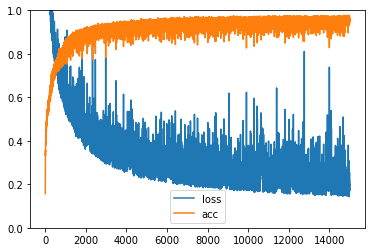

In [7]:
#Loss Accuracy
historydf=pd.DataFrame(history.history,index=history.epoch)
historydf.plot(ylim=(0,1))

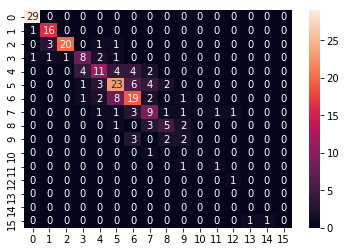

In [23]:
#confusion matrix
import seaborn as sn
df_cm = pd.DataFrame(confusion_matrix(y_test_class, y_pred_class))
sn.heatmap(df_cm, annot=True)

In [24]:
y_test_class2=list(y_test_class)

In [26]:
y_test_class2.sort()

In [27]:
y_test_class2

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 11,
 11,
 13,
 16,
 16]

In [28]:
from itertools import groupby
y_testtest=[len(list(group)) for key, group in groupby(y_test_class2)]

In [31]:
i=0
cm2=pd.DataFrame()
for j in range(len(y_testtest)):
       if y_testtest[j]>0:
            cm2[i]=cm[i]/y_testtest[j]
            i=i+1

cm_final=np.round(np.transpose(cm2),2)

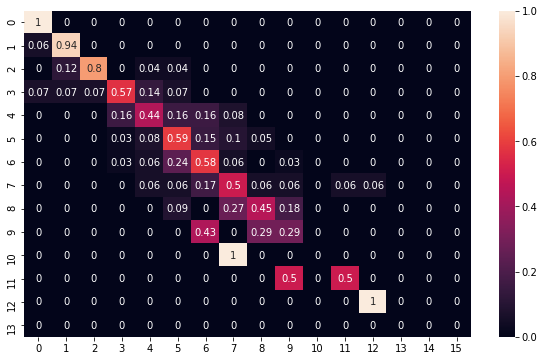

In [32]:
plt.subplots(figsize=(10,6))
sns.heatmap(cm_final, annot=True)

In [32]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X.values, y_cat,
                                                    test_size=0.2)

clf=RandomForestClassifier(n_estimators=500,max_features=4,max_depth=1000,bootstrap=True)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5714285714285714
